Problem Set 3: EDA para problema de Enrollement
===

#### Importación librerías de trabajo


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import summarytools
import statsmodels.formula.api as smf

In [177]:
# Importación dataset de trabajo

df = pd.read_stata('casestudy_dropout.dta')

In [178]:
print(df.shape)
display(df.sample(5))

(8516, 19)


,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before
2385,2386.0,4948,10.0,2022-06-22,3.0,1,1,16,3.7,83,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-16,0.0
5093,5094.0,10455,2.0,2022-07-26,2.0,0,0,6,5.6,7,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-27,0.0
1518,1519.0,2599,4.0,2022-07-26,2.0,1,1,8,6.2,90,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-27,0.0
315,316.0,337,11.0,2022-04-28,4.0,0,1,15,6.6,100,1.0,0.0,0.0,0.0,1.0,1.0,0.0,22,1.0
3976,3977.0,9318,4.0,2022-04-26,2.0,1,0,8,6.0,100,1.0,0.0,1.0,0.0,1.0,1.0,0.0,24,1.0


#### **Descripción del dataset**

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   float32       
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   float32       
 3   DropoutDate              8516 non-null   datetime64[ns]
 4   DayOfWeekDroppedOut      8516 non-null   float32       
 5   PrioritaryStudentIn2021  8516 non-null   int8          
 6   Female                   8516 non-null   int8          
 7   Age                      8516 non-null   int8          
 8   GPAin2021                8416 non-null   float64       
 9   AttendanceIn2021         8516 non-null   int8          
 10  GraduatedIn2021          8516 non-null   float32       
 11  Migrant                  8516 non-null   float32       
 12  ListedInDropoutReport    8516 non-

In [180]:
#df.columns = [
    'Id_estudiante',
    'Id_colegio',
    'curso_año_2022',
    'fecha_abandono',
    'día_semana_abandono',
    'estudiante_prioritario_2021',
    'mujer',
    'edad',
    'rendimiento_2021',
    'asistencia_2021',
    'graduado_2021',
    'estudiante_migrante',
    'reportado_por_abandono',
    'director_ADP',
    'reincorporado_al_30_agosto',
    'graduado_2022',
    'establecimiento_municipal',
    'dias_lectivos_mayo',
    'abandono_antes_30_mayo'
]

IndentationError: unexpected indent (976613240.py, line 2)

In [181]:
df.columns

Index(['IDstudent', 'IDschool', 'SchoolGrade2022', 'DropoutDate',
       'DayOfWeekDroppedOut', 'PrioritaryStudentIn2021', 'Female', 'Age',
       'GPAin2021', 'AttendanceIn2021', 'GraduatedIn2021', 'Migrant',
       'ListedInDropoutReport', 'SchoolPrincipalADP', 'EnrolledByAug312022',
       'GraduatedIn2022', 'MunicipalSchool', 'SchoolDaysFromMay302022',
       'DroppedOutMay30Before'],
      dtype='object')

In [182]:
# Castear variables float a int con un ciclo for}

df1 = df.drop(['GPAin2021','DropoutDate'], axis=1)
df1 = df1.astype(int)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   IDstudent                8516 non-null   int32
 1   IDschool                 8516 non-null   int32
 2   SchoolGrade2022          8516 non-null   int32
 3   DayOfWeekDroppedOut      8516 non-null   int32
 4   PrioritaryStudentIn2021  8516 non-null   int32
 5   Female                   8516 non-null   int32
 6   Age                      8516 non-null   int32
 7   AttendanceIn2021         8516 non-null   int32
 8   GraduatedIn2021          8516 non-null   int32
 9   Migrant                  8516 non-null   int32
 10  ListedInDropoutReport    8516 non-null   int32
 11  SchoolPrincipalADP       8516 non-null   int32
 12  EnrolledByAug312022      8516 non-null   int32
 13  GraduatedIn2022          8516 non-null   int32
 14  MunicipalSchool          8516 non-null   int32
 15  Scho

In [183]:
df1['DropoutDate']= df['DropoutDate']
df1['GPAin2021']= df['GPAin2021']

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   int32         
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   int32         
 3   DayOfWeekDroppedOut      8516 non-null   int32         
 4   PrioritaryStudentIn2021  8516 non-null   int32         
 5   Female                   8516 non-null   int32         
 6   Age                      8516 non-null   int32         
 7   AttendanceIn2021         8516 non-null   int32         
 8   GraduatedIn2021          8516 non-null   int32         
 9   Migrant                  8516 non-null   int32         
 10  ListedInDropoutReport    8516 non-null   int32         
 11  SchoolPrincipalADP       8516 non-null   int32         
 12  EnrolledByAug312022      8516 non-

##### Valores únicos por atributos

In [184]:
df1.nunique()

IDstudent                  8516
IDschool                   2261
SchoolGrade2022              12
DayOfWeekDroppedOut           5
PrioritaryStudentIn2021       2
Female                        2
Age                          14
AttendanceIn2021            101
GraduatedIn2021               2
Migrant                       2
ListedInDropoutReport         2
SchoolPrincipalADP            2
EnrolledByAug312022           2
GraduatedIn2022               2
MunicipalSchool               2
SchoolDaysFromMay302022      61
DroppedOutMay30Before         2
DropoutDate                  61
GPAin2021                    60
dtype: int64

##### Revisión de datos faltantes

In [185]:
df1.isnull().sum()

IDstudent                    0
IDschool                     0
SchoolGrade2022              0
DayOfWeekDroppedOut          0
PrioritaryStudentIn2021      0
Female                       0
Age                          0
AttendanceIn2021             0
GraduatedIn2021              0
Migrant                      0
ListedInDropoutReport        0
SchoolPrincipalADP           0
EnrolledByAug312022          0
GraduatedIn2022              0
MunicipalSchool              0
SchoolDaysFromMay302022      0
DroppedOutMay30Before        0
DropoutDate                  0
GPAin2021                  100
dtype: int64

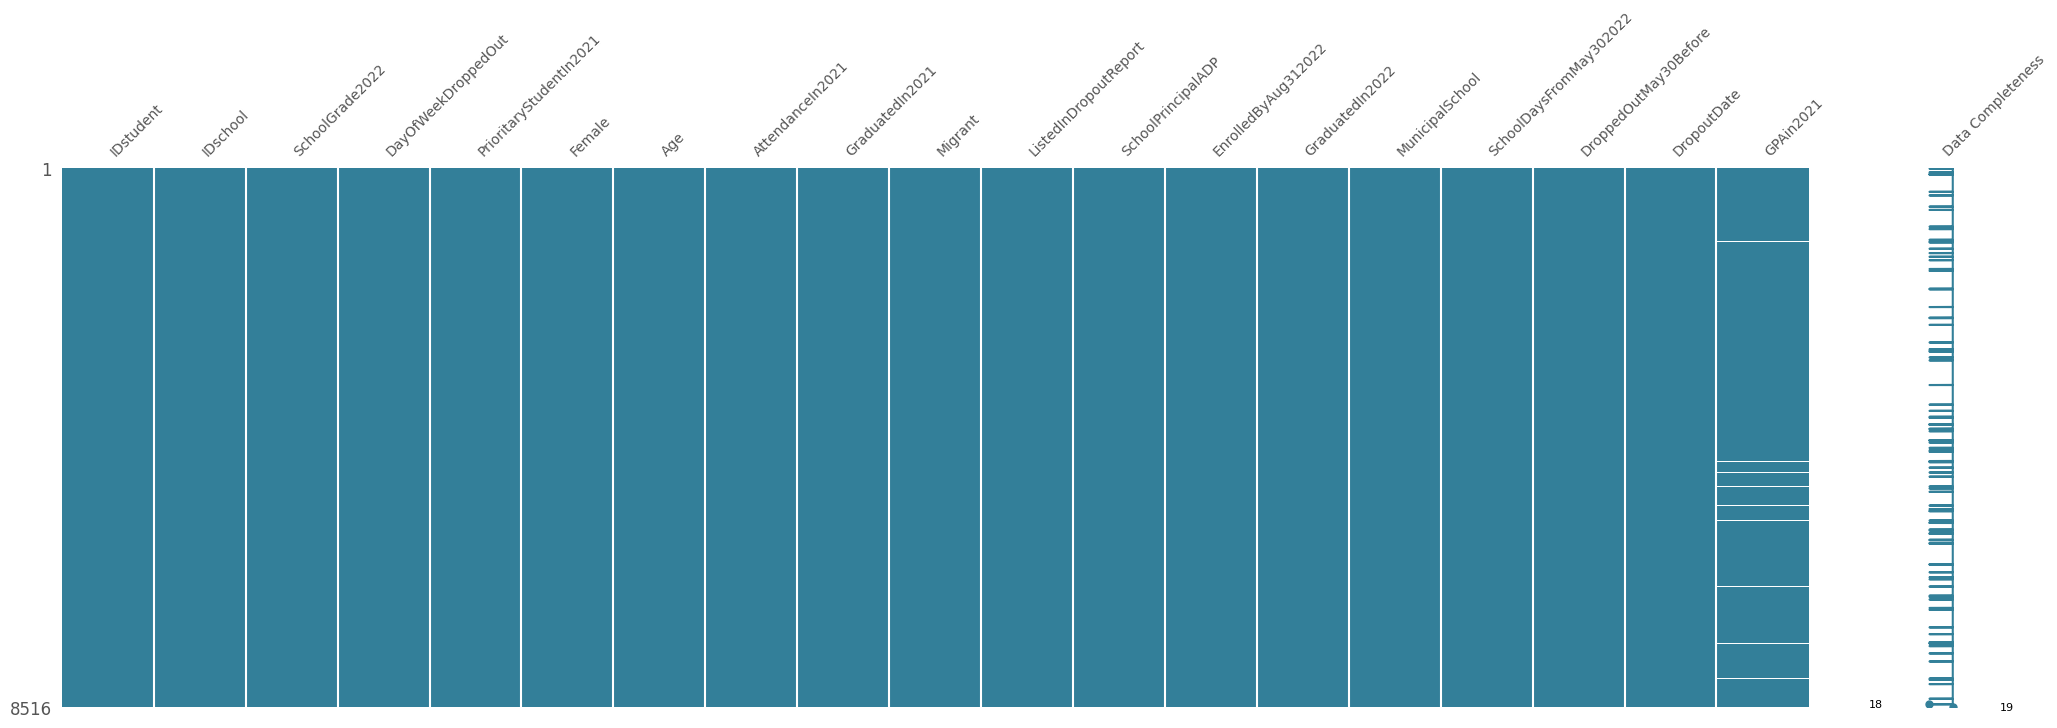

In [186]:
# Matriz de nulos

msno.matrix(df1, figsize=(25, 7), fontsize=10, labels=True, color=(0.2, 0.5, 0.6));

#### **Resumen descriptivo atributos**

In [187]:
round(df1.iloc[:,2:].describe(),3).T

,count,mean,min,25%,50%,75%,max,std
SchoolGrade2022,8516.0,7.397,1.0,5.0,8.0,10.0,12.0,3.145
DayOfWeekDroppedOut,8516.0,2.894,1.0,2.0,3.0,4.0,5.0,1.408
PrioritaryStudentIn2021,8516.0,0.647,0.0,0.0,1.0,1.0,1.0,0.478
Female,8516.0,0.531,0.0,0.0,1.0,1.0,1.0,0.499
Age,8516.0,12.054,6.0,9.0,13.0,15.0,19.0,3.46
AttendanceIn2021,8516.0,82.943,0.0,85.0,86.0,96.0,100.0,22.169
GraduatedIn2021,8516.0,0.907,0.0,1.0,1.0,1.0,1.0,0.29
Migrant,8516.0,0.117,0.0,0.0,0.0,0.0,1.0,0.322
ListedInDropoutReport,8516.0,0.182,0.0,0.0,0.0,0.0,1.0,0.386
SchoolPrincipalADP,8516.0,0.446,0.0,0.0,0.0,1.0,1.0,0.497


In [188]:
descriptivos = round(df1.iloc[:,2:].describe(),3).T

In [189]:
descriptivos = pd.DataFrame(descriptivos)


In [190]:
descriptivos

,count,mean,min,25%,50%,75%,max,std
SchoolGrade2022,8516.0,7.397,1.0,5.0,8.0,10.0,12.0,3.145
DayOfWeekDroppedOut,8516.0,2.894,1.0,2.0,3.0,4.0,5.0,1.408
PrioritaryStudentIn2021,8516.0,0.647,0.0,0.0,1.0,1.0,1.0,0.478
Female,8516.0,0.531,0.0,0.0,1.0,1.0,1.0,0.499
Age,8516.0,12.054,6.0,9.0,13.0,15.0,19.0,3.46
AttendanceIn2021,8516.0,82.943,0.0,85.0,86.0,96.0,100.0,22.169
GraduatedIn2021,8516.0,0.907,0.0,1.0,1.0,1.0,1.0,0.29
Migrant,8516.0,0.117,0.0,0.0,0.0,0.0,1.0,0.322
ListedInDropoutReport,8516.0,0.182,0.0,0.0,0.0,0.0,1.0,0.386
SchoolPrincipalADP,8516.0,0.446,0.0,0.0,0.0,1.0,1.0,0.497


#### Visualización univariada

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\2946455337.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1a, x=cols, palette='viridis');
C:\Users\luian\AppData\Local\Temp\ipykernel_9140\2946455337.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1a, x=cols, palette='viridis');
C:\Users\luian\AppData\Local\Temp\ipykernel_9140\2946455337.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1a, x=cols, palette='viridis');
C:\Users\luian\AppData\Local\Temp\ipykernel_9140\2946455337.py:13: FutureWarning: 

P

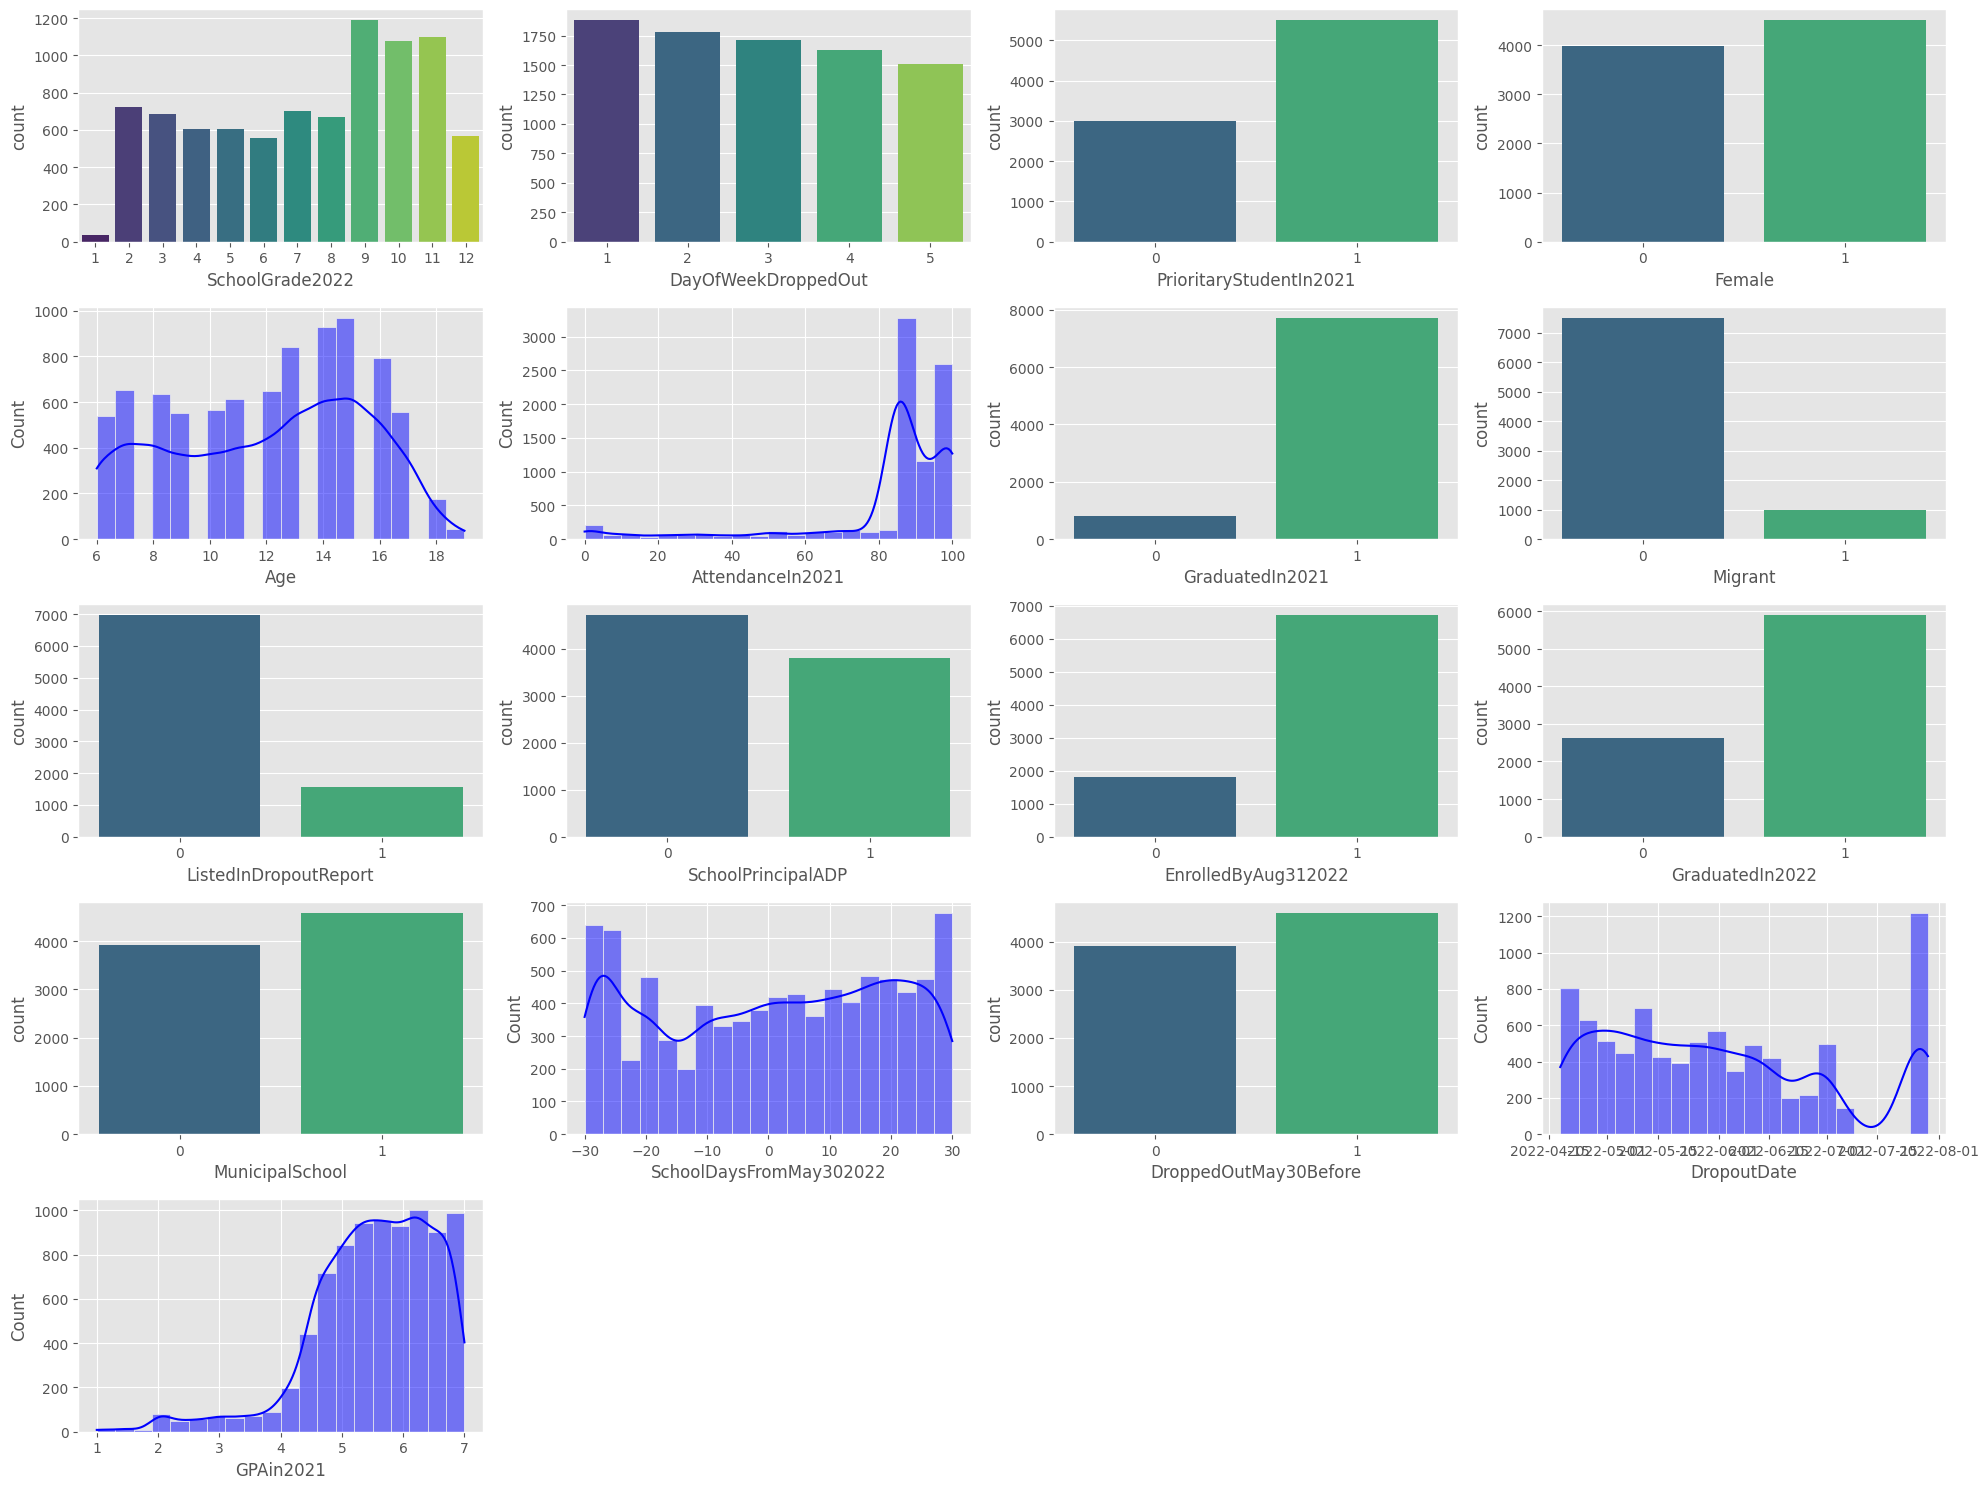

In [191]:

plt.style.use('ggplot')

df1a = df1.iloc[:,2:]

nrows=5
ncols=4

plt.figure(figsize=(20,15))

for cols in df1a.columns:
    if df1a[cols].nunique() < 13:
        plt.subplot(nrows, ncols, df1a.columns.get_loc(cols)+1)
        sns.countplot(data=df1a, x=cols, palette='viridis');
        #plt.title(cols)
    
    else:
        plt.subplot(nrows, ncols, df1a.columns.get_loc(cols)+1)
        sns.histplot(df1a[cols], kde=True, color='blue', bins=20);
        #plt.title(cols)

plt.tight_layout();

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\1189522131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1,


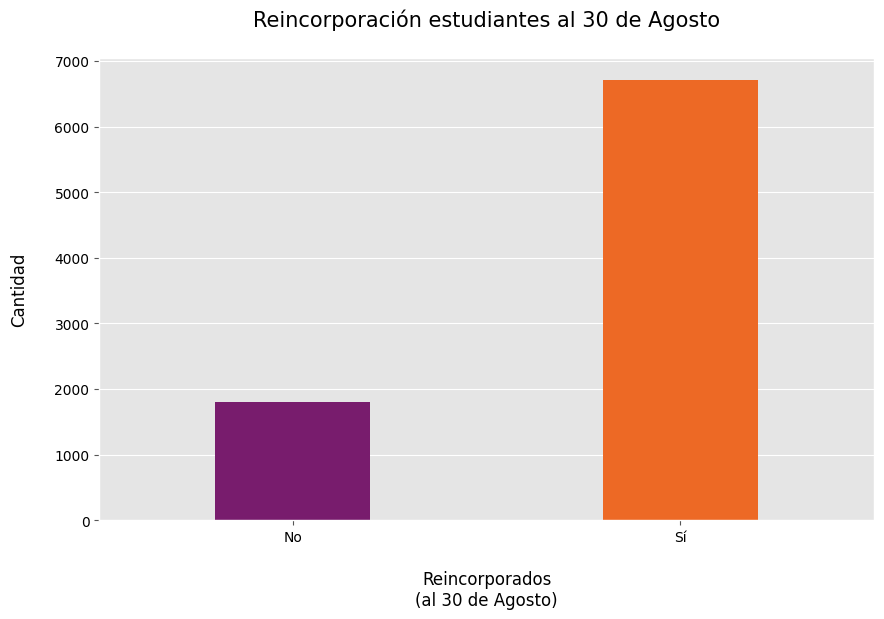

In [192]:
# Graficación vector objetivo 'reincorporado_al_30_agosto'

plt.figure(figsize=(10,6))

sns.countplot(data=df1, 
              x='EnrolledByAug312022', 
              #hue='mujer',
              #stat='percent',
              saturation=1, gap=0.5, palette='inferno');

plt.title('Reincorporación estudiantes al 30 de Agosto\n', fontsize=15, color='black');
plt.xlabel('\nReincorporados\n(al 30 de Agosto)', fontsize=12, color='black');
plt.ylabel('Cantidad\n',fontsize=12, color='black');
plt.xticks(ticks=[0,1], labels=['No', 'Sí'], fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
#plt.ylim(0,100)
#plt.legend(title='Sexo', fontsize=10, title_fontsize=10, loc='upper right', labels=['Hombre', 'Mujer']);


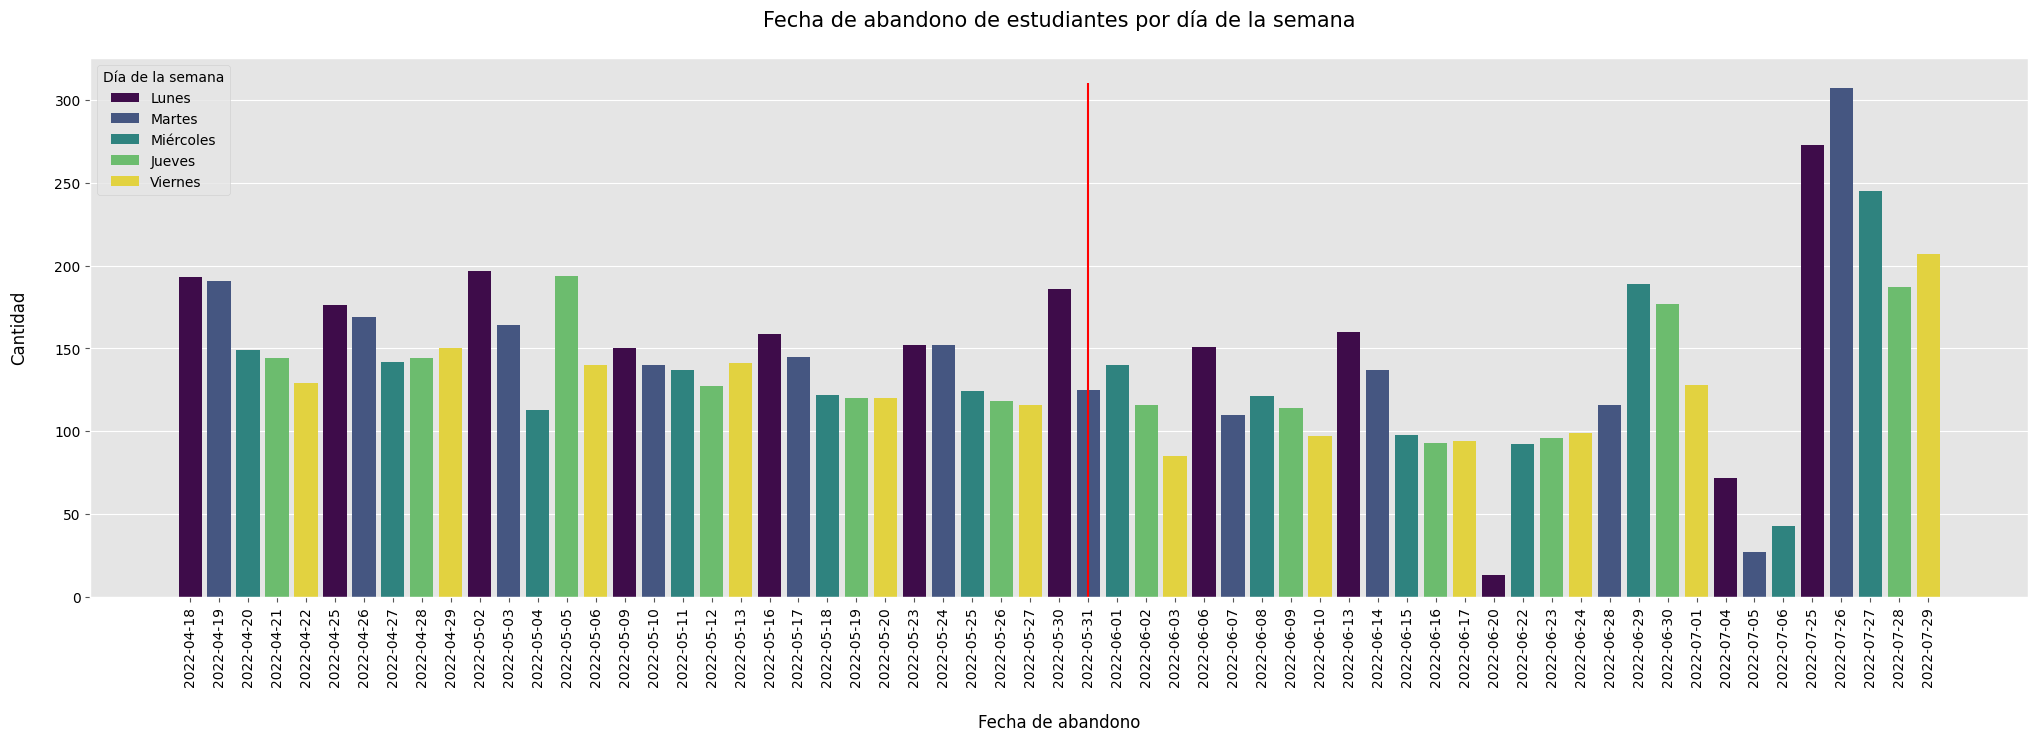

In [193]:
# Graficación Fecha de abandono

plt.figure(figsize=(25,7))
sns.countplot(data=df1, x='DropoutDate',order=df1['DropoutDate'].sort_values().unique(), hue='DayOfWeekDroppedOut', palette='viridis')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=310, color='red', linestyle='-');
plt.title('Fecha de abandono de estudiantes por día de la semana\n', fontsize=15, color='black');
plt.xlabel('\nFecha de abandono', fontsize=12, color='black');
plt.ylabel('Cantidad\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.legend(title='Día de la semana', fontsize=10, title_fontsize=10, loc='upper left', labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']);

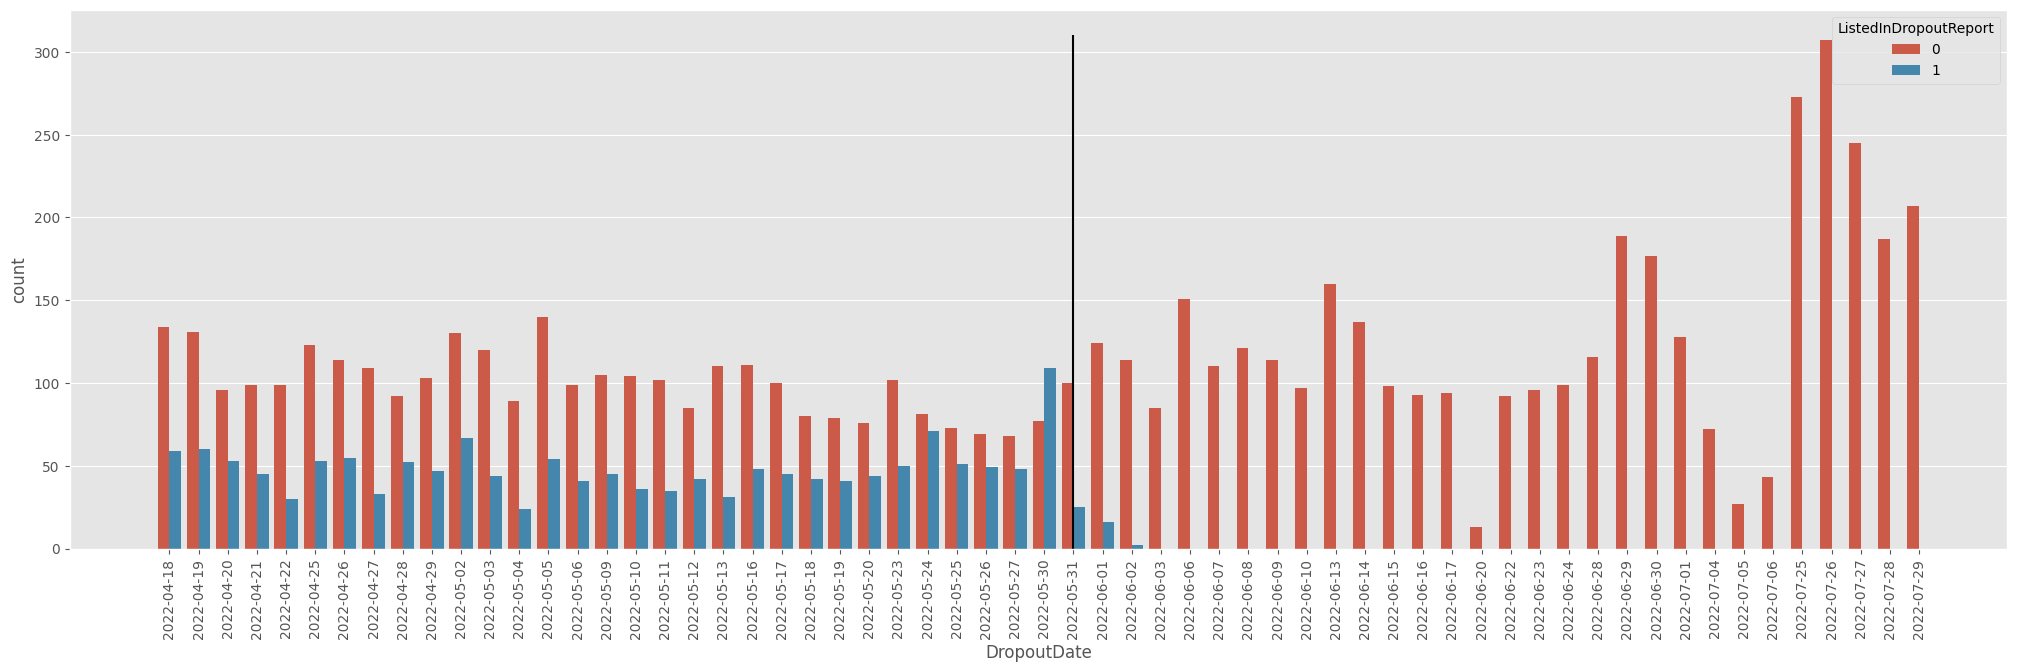

In [194]:
plt.figure(figsize=(25,7))
sns.countplot(data=df1,  x='DropoutDate',order=df1['DropoutDate'].sort_values().unique(), hue='ListedInDropoutReport')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=310, color='black', linestyle='-');

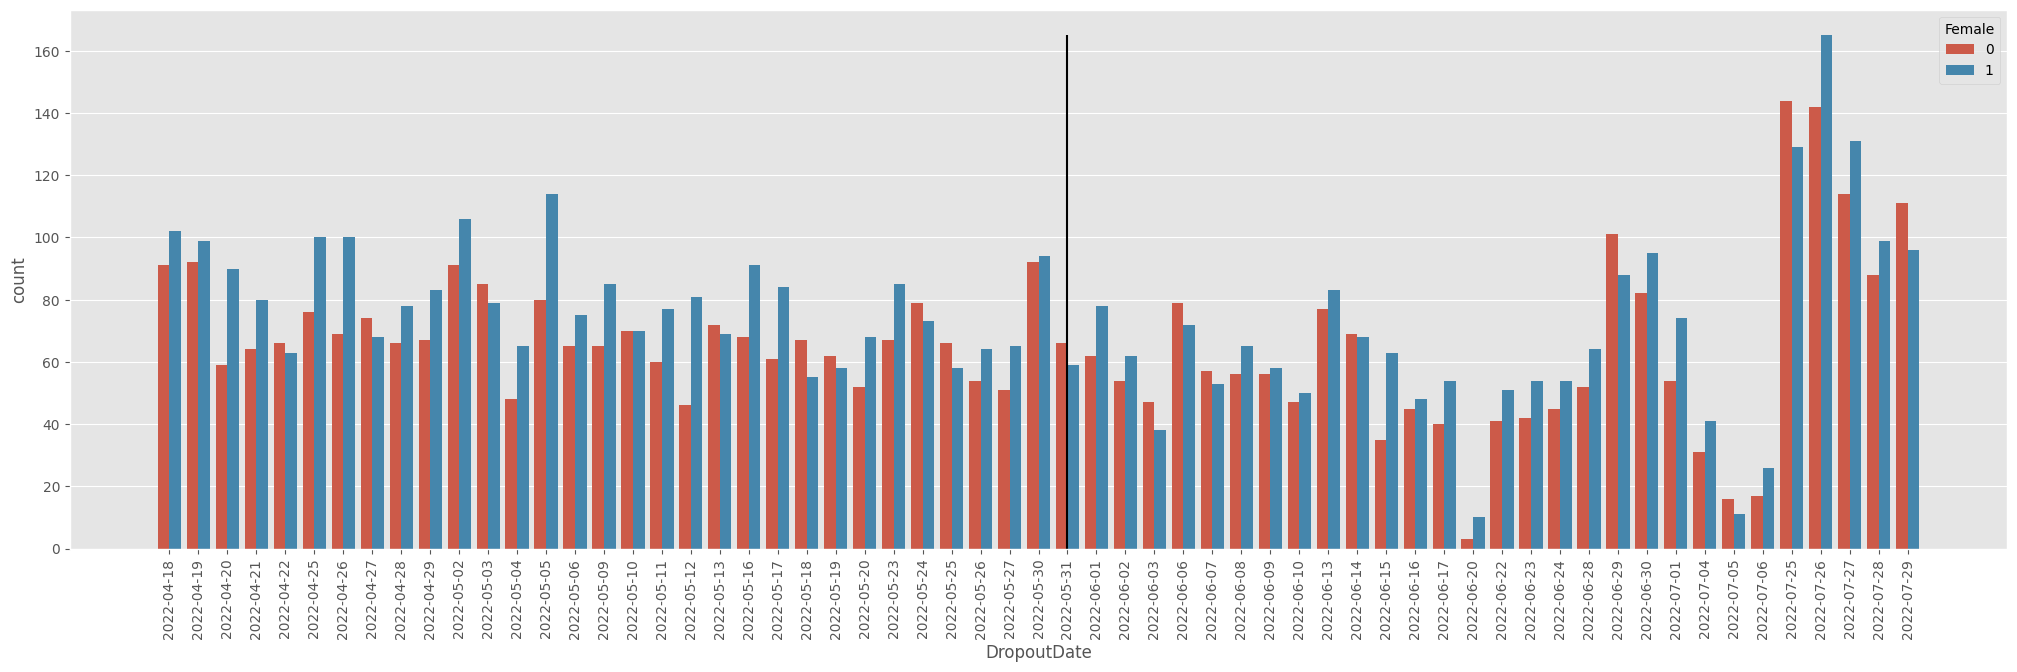

In [195]:
plt.figure(figsize=(25,7))
sns.countplot(data=df1, x='DropoutDate',order=df1['DropoutDate'].sort_values().unique(), hue='Female')    
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=165, color='black', linestyle='-');

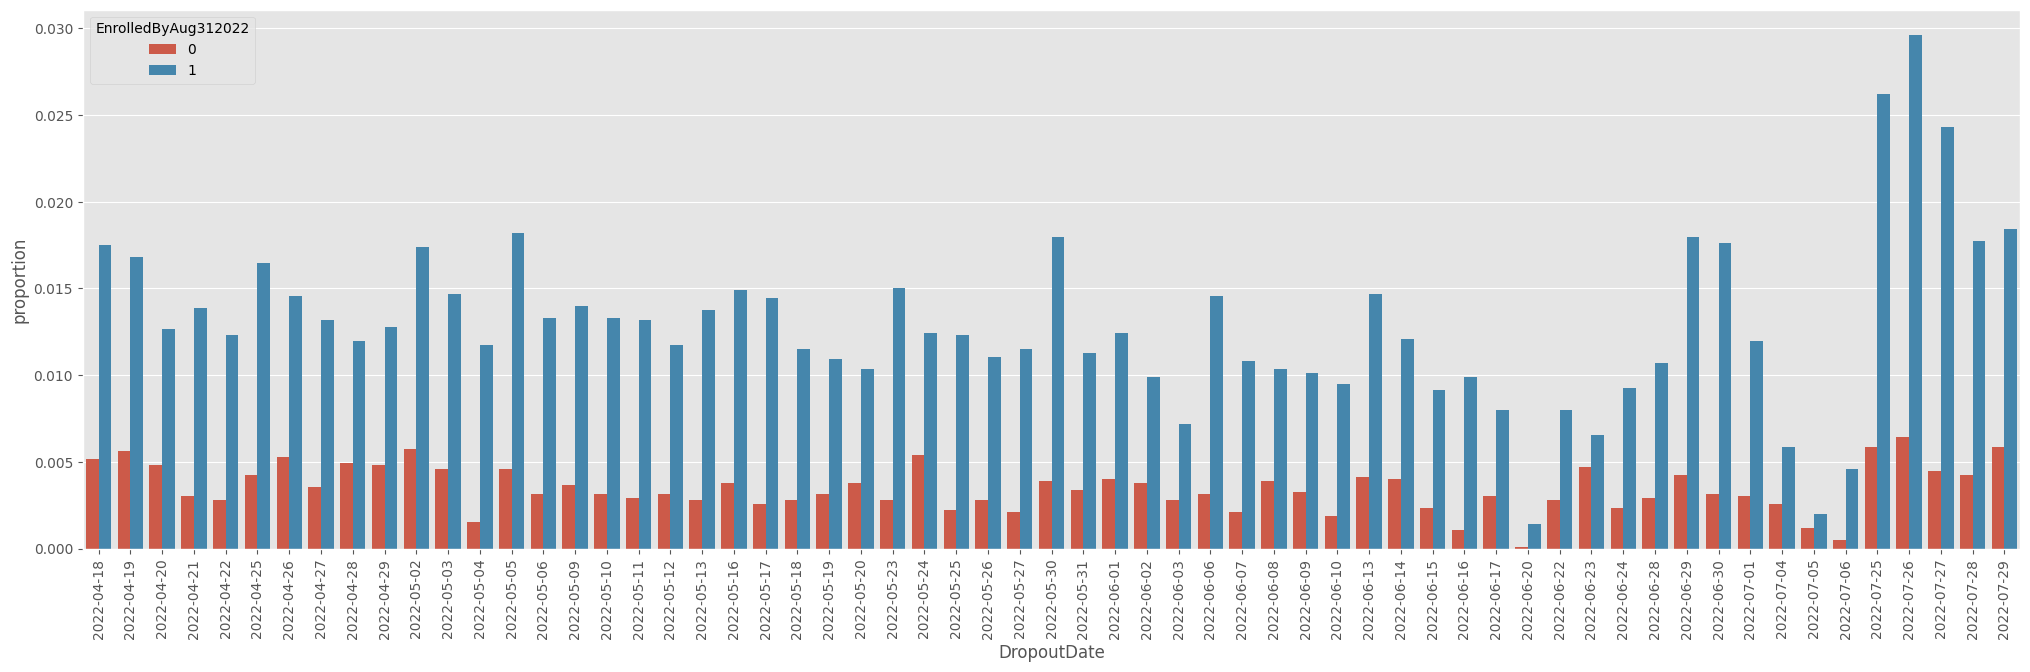

In [196]:
plt.figure(figsize=(25,7))
sns.countplot(data=df1, x='DropoutDate',order=df1['DropoutDate'].sort_values().unique(), hue='EnrolledByAug312022',stat='proportion')
plt.xticks(rotation=90);
#plt.vlines(x='2022-05-31', ymin=0, ymax=250, color='black', linestyle='-');

### PCA y descripción de componentes extraídos

In [197]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [198]:
df1.head()

,IDstudent,IDschool,SchoolGrade2022,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,DropoutDate,GPAin2021
0,1,1,12,5,0,0,18,55,0,0,0,1,0,0,1,-14,0,2022-06-17,2.0
1,2,1,9,5,0,1,15,55,0,0,1,1,1,0,1,11,1,2022-05-13,2.5
2,3,1,10,3,1,1,14,88,1,0,0,1,0,0,1,28,1,2022-04-20,4.9
3,4,4,10,1,1,1,14,90,1,0,1,1,0,0,1,20,1,2022-05-02,5.8
4,5,4,12,3,0,1,17,100,1,0,0,1,0,0,1,-12,0,2022-06-15,4.6


In [1]:
# Imputamos valores faltantes en la variable GPAin2021 
df['GPAin2021'].fillna(df['GPAin2021'].mean(), inplace=True)
df.isnull().sum()

NameError: name 'df' is not defined

In [200]:
# Convertimos la variable DayOfWeekDroppedOut en dummies

df1 = pd.get_dummies(df1, columns=['DayOfWeekDroppedOut'], dtype=int)
df1.head()

,IDstudent,IDschool,SchoolGrade2022,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,...,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,DropoutDate,GPAin2021,DayOfWeekDroppedOut_1,DayOfWeekDroppedOut_2,DayOfWeekDroppedOut_3,DayOfWeekDroppedOut_4,DayOfWeekDroppedOut_5
0,1,1,12,0,0,18,55,0,0,0,...,1,-14,0,2022-06-17,2.0,0,0,0,0,1
1,2,1,9,0,1,15,55,0,0,1,...,1,11,1,2022-05-13,2.5,0,0,0,0,1
2,3,1,10,1,1,14,88,1,0,0,...,1,28,1,2022-04-20,4.9,0,0,1,0,0
3,4,4,10,1,1,14,90,1,0,1,...,1,20,1,2022-05-02,5.8,1,0,0,0,0
4,5,4,12,0,1,17,100,1,0,0,...,1,-12,0,2022-06-15,4.6,0,0,1,0,0


In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   int32         
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   int32         
 3   PrioritaryStudentIn2021  8516 non-null   int32         
 4   Female                   8516 non-null   int32         
 5   Age                      8516 non-null   int32         
 6   AttendanceIn2021         8516 non-null   int32         
 7   GraduatedIn2021          8516 non-null   int32         
 8   Migrant                  8516 non-null   int32         
 9   ListedInDropoutReport    8516 non-null   int32         
 10  SchoolPrincipalADP       8516 non-null   int32         
 11  EnrolledByAug312022      8516 non-null   int32         
 12  GraduatedIn2022          8516 non-

In [202]:
df1.drop(columns=['EnrolledByAug312022','DropoutDate'], axis=1, inplace=True)

In [203]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# df1_scaled = scaler.fit_transform(df1.iloc[:,2:]), columns=df1.columns[2:]
#df1.drop(['DropoutDate'], axis=1, inplace=True)
df1_scaled = scaler.fit_transform(df1.iloc[:,2:])


In [204]:
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns[2:])

In [205]:
df1_scaled.head()

,SchoolGrade2022,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,GPAin2021,DayOfWeekDroppedOut_1,DayOfWeekDroppedOut_2,DayOfWeekDroppedOut_3,DayOfWeekDroppedOut_4,DayOfWeekDroppedOut_5
0,1.000000,0.0,0.0,0.923077,0.55,0.0,0.0,0.0,1.0,0.0,1.0,0.266667,0.0,0.166667,0.0,0.0,0.0,0.0,1.0
1,0.727273,0.0,1.0,0.692308,0.55,0.0,0.0,1.0,1.0,0.0,1.0,0.683333,1.0,0.250000,0.0,0.0,0.0,0.0,1.0
2,0.818182,1.0,1.0,0.615385,0.88,1.0,0.0,0.0,1.0,0.0,1.0,0.966667,1.0,0.650000,0.0,0.0,1.0,0.0,0.0
3,0.818182,1.0,1.0,0.615385,0.90,1.0,0.0,1.0,1.0,0.0,1.0,0.833333,1.0,0.800000,1.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,1.0,0.846154,1.00,1.0,0.0,0.0,1.0,0.0,1.0,0.300000,0.0,0.600000,0.0,0.0,1.0,0.0,0.0


In [206]:
# Extracción de componentes principales con PCA

pca = PCA(n_components=0.9) # Se conserva el 90% de la varianza 
pca_result = pca.fit_transform(df1_scaled) # Se aplica la transformación



In [207]:
# Se crea un DataFrame con los resultados de PCA
pca_result = pd.DataFrame(pca_result, columns=[f'PC_{i+1}' for i in range(pca_result.shape[1])])

In [208]:
pca_result.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11
0,0.760910,-0.556153,0.547850,-0.277353,-0.947679,-0.415359,-0.007031,0.188483,0.980842,0.562015,-0.271391
1,0.997147,0.796605,0.913890,0.038848,-0.229323,-0.050415,0.217153,0.114865,0.976919,0.160464,0.240219
2,0.912488,0.378900,0.279306,0.600932,-0.063579,-0.090170,0.637178,-0.612948,-0.166615,-0.074440,-0.394172
3,1.039042,0.955964,0.227736,0.414481,0.155848,-0.628257,-0.449132,-0.107450,-0.074574,-0.136385,0.474606
4,0.712328,-0.602604,1.019072,0.033123,-0.119318,-0.283008,0.512377,-0.630902,-0.093921,0.485530,0.096690


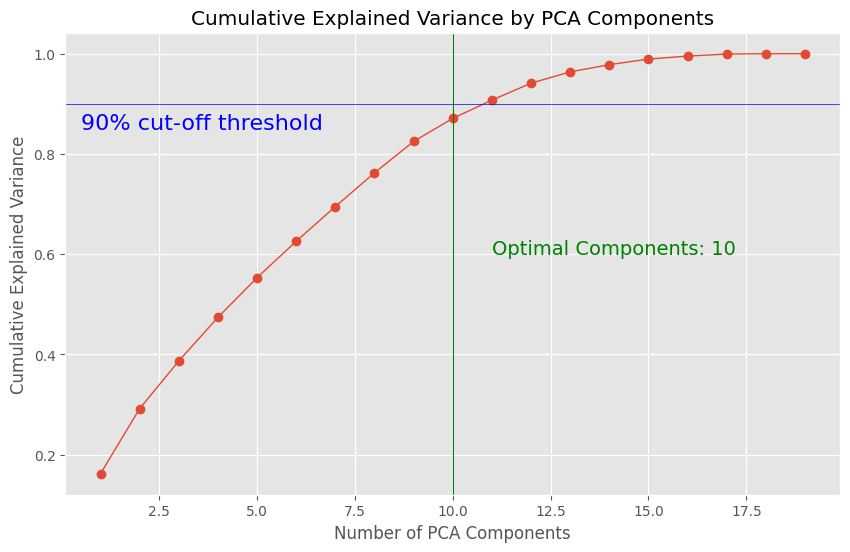

10

In [209]:
# Fit PCA to the data without reducing dimensions and compute the explained variance ratio
pca_full = PCA()
pca_full.fit(df1_scaled)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance ratio to find the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-',linewidth=1)
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='blue', linestyle='-',linewidth=0.5)  # 95% variance line for reference
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'blue', fontsize=16)

# Determine the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance >= 0.9]) + 1

# Highlight the optimal number of components on the plot
plt.axvline(x=optimal_num_components, color='g', linestyle='-', linewidth=0.75)
plt.text(optimal_num_components + 1, 0.6, f'Optimal Components: {optimal_num_components}', color = 'green', fontsize=14)

plt.show()

# Returning the optimal number of components
optimal_num_components

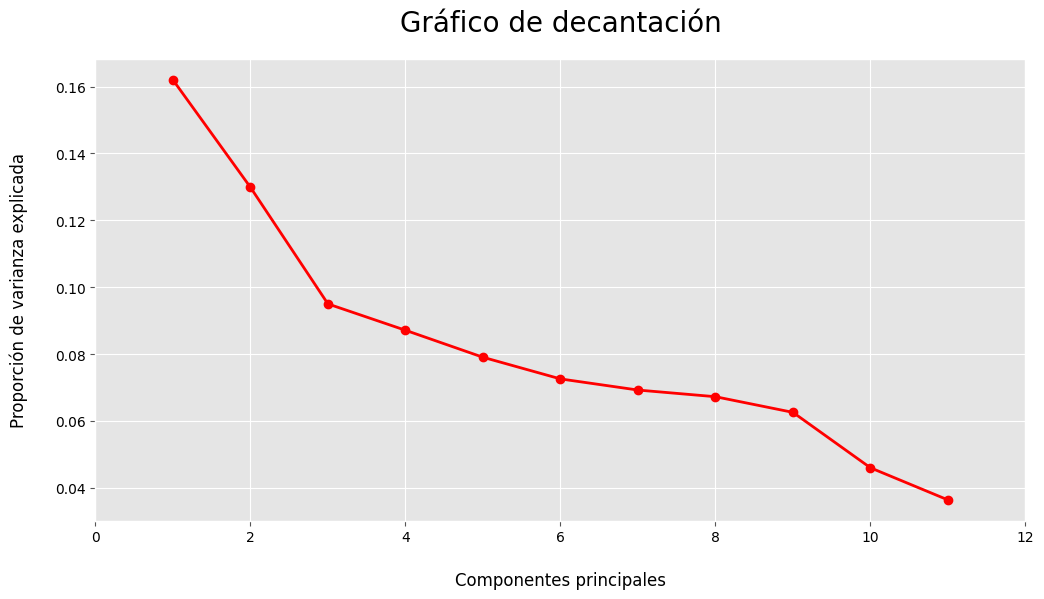

In [234]:
plt.figure(figsize=(12, 6))

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Gráfico de decantación', fontsize=20, color='black', loc='center', pad=20)
plt.xlabel('\nComponentes principales', color='black', fontsize=12)
plt.xlim(0, 12)
plt.xticks(color='black', fontsize=10)
plt.ylabel('Proporción de varianza explicada\n', color='black', fontsize=12)
plt.yticks(color='black', fontsize=10)
plt.show()

In [239]:
print ("Proporción de la varianza explicada : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("\nVarianza explicada acumulada: ", out_sum)


Proporción de la varianza explicada :  [0.16198138 0.12988125 0.09503197 0.0871587  0.0790898  0.07261614
 0.06929034 0.06730014 0.06261945 0.04605235 0.03644995]

Varianza explicada acumulada:  [0.16198138 0.29186263 0.3868946  0.4740533  0.5531431  0.62575924
 0.69504958 0.76234972 0.82496917 0.87102152 0.90747147]


In [241]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11'], index=df1_scaled.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
SchoolGrade2022,0.056630,0.058568,0.073068,0.159731,-0.211383,-0.092908,-0.002502,0.006848,0.056172,0.622943,0.000404
PrioritaryStudentIn2021,0.088084,-0.028390,-0.454919,0.741259,-0.133317,-0.035235,-0.117091,0.050385,-0.052999,-0.311502,-0.094913
Female,0.063522,0.078692,0.554112,0.460781,0.657232,0.183085,-0.022956,-0.038759,0.016568,0.025721,0.008866
Age,0.067559,0.064711,0.085053,0.175493,-0.206957,-0.091215,-0.009502,0.007406,0.052726,0.558647,-0.016742
AttendanceIn2021,-0.008633,-0.022177,-0.041741,-0.070862,0.082687,0.035349,0.032235,-0.011561,0.007767,-0.013709,0.154046
GraduatedIn2021,-0.049981,-0.044174,-0.083811,-0.143352,0.132788,0.057384,0.037729,-0.012462,-0.013611,-0.057417,0.245800
Migrant,0.063399,-0.009104,0.263880,-0.278683,-0.041706,-0.027326,-0.005607,-0.021826,-0.020209,-0.188220,-0.299113
ListedInDropoutReport,0.082990,0.381653,0.085194,0.045871,-0.151553,-0.037922,0.024406,-0.006248,-0.001038,-0.113683,0.824445
SchoolPrincipalADP,0.670642,-0.136395,-0.089774,-0.115241,0.082609,0.040623,0.043974,-0.021101,-0.010058,0.015641,0.055706
GraduatedIn2022,-0.191587,-0.142556,-0.553981,-0.098141,0.497936,0.227558,0.115616,-0.014785,-0.010003,0.355200,0.122832


In [284]:
# Extracción de componentes principales con PCA

pca1 = PCA(n_components=7) # Se conserva el 90% de la varianza 
pca_result1 = pca1.fit_transform(df1_scaled) # Se aplica la transformación

In [285]:
# Se crea un DataFrame con los resultados de PCA
pca_result1 = pd.DataFrame(pca_result1, columns=[f'PC_{i+1}' for i in range(pca_result1.shape[1])])

In [286]:
para_visualizar = pd.concat([pca_result1,df['EnrolledByAug312022']], axis=1)
para_visualizar.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,EnrolledByAug312022
0,0.760910,-0.556153,0.547850,-0.277353,-0.947679,-0.415359,-0.007031,0.0
1,0.997147,0.796605,0.913890,0.038848,-0.229323,-0.050415,0.217153,1.0
2,0.912488,0.378900,0.279306,0.600932,-0.063579,-0.090170,0.637178,0.0
3,1.039042,0.955964,0.227736,0.414481,0.155848,-0.628257,-0.449132,0.0
4,0.712328,-0.602604,1.019072,0.033123,-0.119318,-0.283008,0.512377,0.0


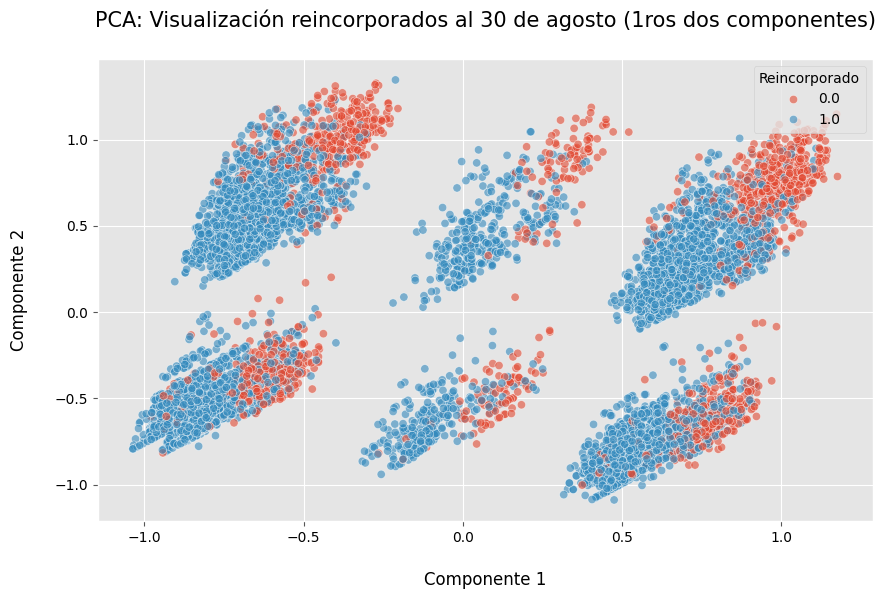

In [287]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=pca_result1, x='PC_1', y='PC_2', hue=df['EnrolledByAug312022'], alpha=0.6);
plt.title('PCA: Visualización reincorporados al 30 de agosto (1ros dos componentes)\n', fontsize=15, color='black');
plt.xlabel('\nComponente 1', fontsize=12, color='black');
plt.ylabel('Componente 2\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.legend(title='Reincorporado', fontsize=10, title_fontsize=10, loc='upper right');
plt.show()

In [289]:
loadings2 = pd.DataFrame(pca1.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'], index=df1_scaled.columns)
loadings2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
SchoolGrade2022,0.056630,0.058568,0.073068,0.159731,-0.211383,-0.092908,-0.002502
PrioritaryStudentIn2021,0.088084,-0.028390,-0.454919,0.741259,-0.133317,-0.035235,-0.117091
Female,0.063522,0.078692,0.554112,0.460781,0.657232,0.183085,-0.022956
Age,0.067559,0.064711,0.085053,0.175493,-0.206957,-0.091215,-0.009502
AttendanceIn2021,-0.008633,-0.022177,-0.041741,-0.070862,0.082687,0.035349,0.032235
GraduatedIn2021,-0.049981,-0.044174,-0.083811,-0.143352,0.132788,0.057384,0.037729
Migrant,0.063399,-0.009104,0.263880,-0.278683,-0.041706,-0.027326,-0.005607
ListedInDropoutReport,0.082990,0.381653,0.085194,0.045871,-0.151553,-0.037922,0.024406
SchoolPrincipalADP,0.670642,-0.136395,-0.089774,-0.115241,0.082609,0.040623,0.043974
GraduatedIn2022,-0.191587,-0.142556,-0.553981,-0.098141,0.497936,0.227558,0.115616


In [290]:
loadings2['PC1'].sort_values(ascending=False)

MunicipalSchool            0.680229
SchoolPrincipalADP         0.670642
DroppedOutMay30Before      0.100183
PrioritaryStudentIn2021    0.088084
ListedInDropoutReport      0.082990
Age                        0.067559
Female                     0.063522
Migrant                    0.063399
SchoolDaysFromMay302022    0.058556
SchoolGrade2022            0.056630
DayOfWeekDroppedOut_1      0.019492
DayOfWeekDroppedOut_4      0.015470
DayOfWeekDroppedOut_2      0.007779
DayOfWeekDroppedOut_5     -0.003810
AttendanceIn2021          -0.008633
DayOfWeekDroppedOut_3     -0.038930
GPAin2021                 -0.045859
GraduatedIn2021           -0.049981
GraduatedIn2022           -0.191587
Name: PC1, dtype: float64

In [291]:
[loadings2[i].sort_values(ascending=False) for i in loadings2.columns]

[MunicipalSchool            0.680229
 SchoolPrincipalADP         0.670642
 DroppedOutMay30Before      0.100183
 PrioritaryStudentIn2021    0.088084
 ListedInDropoutReport      0.082990
 Age                        0.067559
 Female                     0.063522
 Migrant                    0.063399
 SchoolDaysFromMay302022    0.058556
 SchoolGrade2022            0.056630
 DayOfWeekDroppedOut_1      0.019492
 DayOfWeekDroppedOut_4      0.015470
 DayOfWeekDroppedOut_2      0.007779
 DayOfWeekDroppedOut_5     -0.003810
 AttendanceIn2021          -0.008633
 DayOfWeekDroppedOut_3     -0.038930
 GPAin2021                 -0.045859
 GraduatedIn2021           -0.049981
 GraduatedIn2022           -0.191587
 Name: PC1, dtype: float64,
 DroppedOutMay30Before      0.745254
 SchoolDaysFromMay302022    0.433731
 ListedInDropoutReport      0.381653
 DayOfWeekDroppedOut_1      0.157488
 Female                     0.078692
 Age                        0.064711
 SchoolGrade2022            0.058568
 DayOfWeek

##### Confección/ Recodificación de nuevos atributos

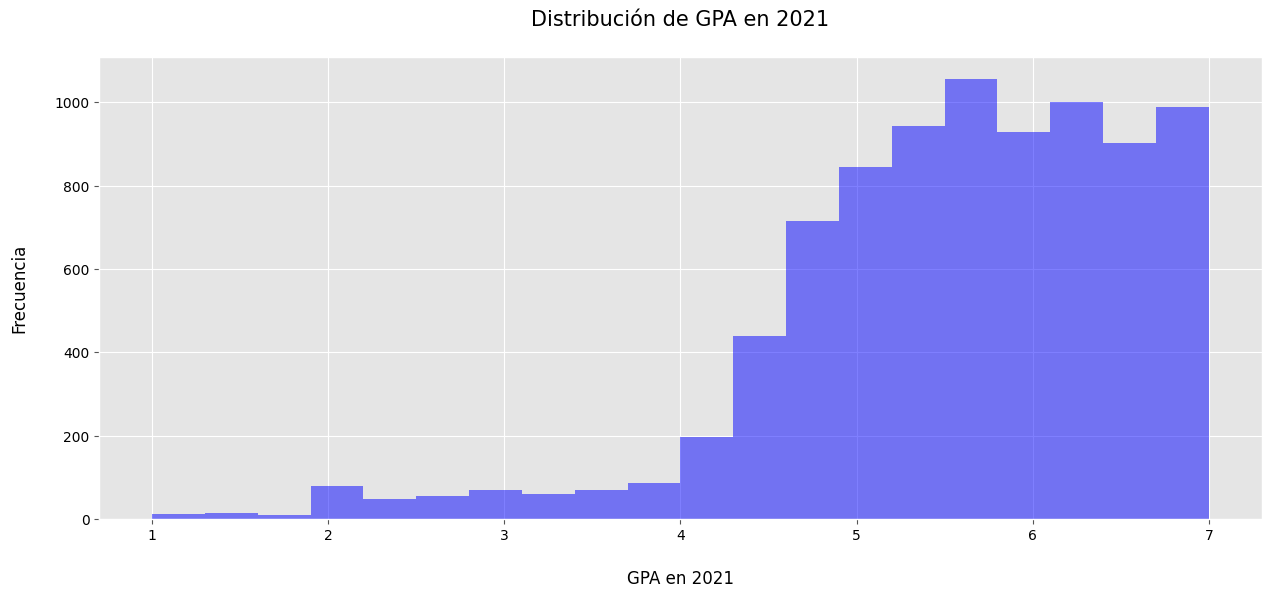

In [293]:
df1['GPAin2021'].plot(kind='hist', bins=20, color='blue', alpha=0.5, figsize=(15,6));
plt.title('Distribución de GPA en 2021\n', fontsize=15, color='black');
plt.xlabel('\nGPA en 2021', fontsize=12, color='black');
plt.ylabel('Frecuencia\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');


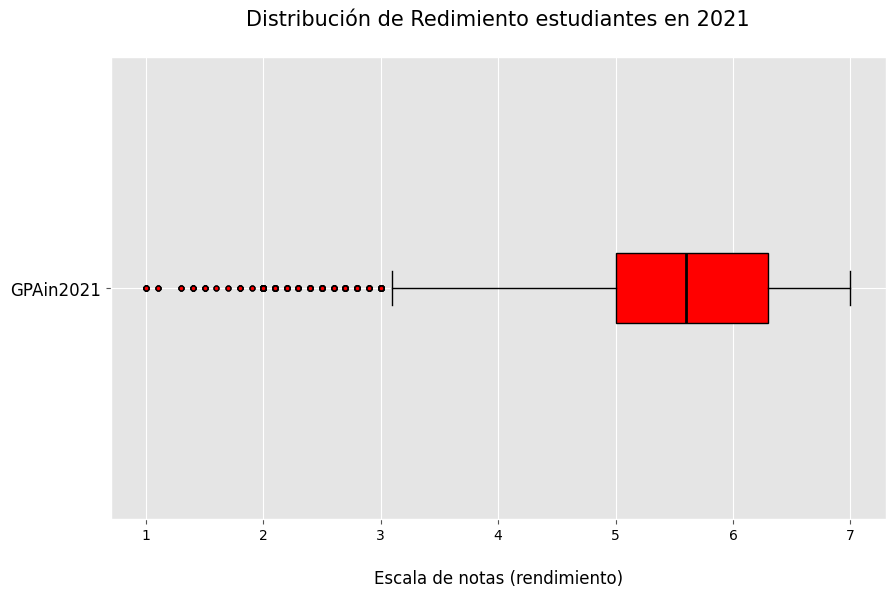

In [312]:
df1['GPAin2021'].plot(kind='box', figsize=(10,6), vert=False, patch_artist=True, boxprops=dict(facecolor='red', color='black'), flierprops=dict(marker='o', markerfacecolor='red', markersize=3.5, color='red'), whiskerprops=dict(color='black', linewidth=1), capprops=dict(color='black', linewidth=1), medianprops=dict(color='black', linewidth=2));
plt.title('Distribución de Redimiento estudiantes en 2021\n', fontsize=15, color='black');
plt.xlabel('\nEscala de notas (rendimiento)', fontsize=12, color='black');
plt.ylabel(None);
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=12, color='black');


In [313]:
# Nota menor a 4.5 es bajo rendimiento

df1['bajo_rendimiento'] = np.where(df1['GPAin2021'] < 4.5, 1, 0)
df1['bajo_rendimiento'].value_counts()

bajo_rendimiento
0    7629
1     887
Name: count, dtype: int64

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\748487418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1,


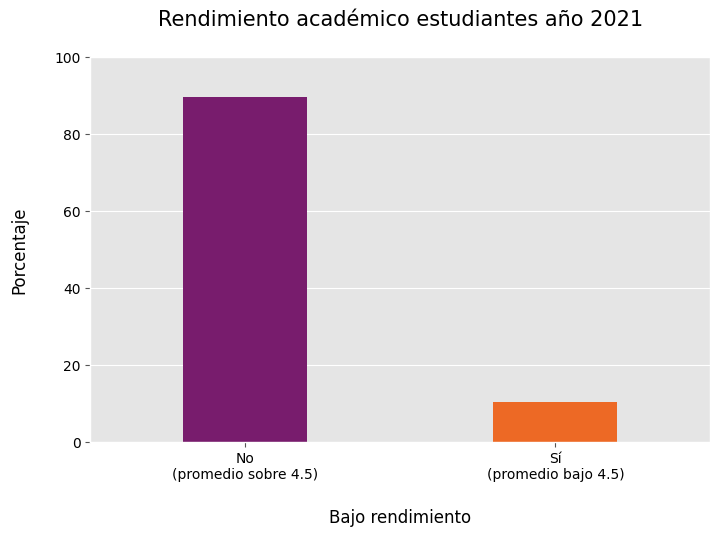

In [317]:
# Graficación de bajo rendimiento   

plt.figure(figsize=(8,5))

sns.countplot(data=df1, 
              x='bajo_rendimiento', 
              #hue='mujer',
              stat='percent',
              saturation=1, gap=0.5, palette='inferno');

plt.title('Rendimiento académico estudiantes año 2021\n', fontsize=15, color='black');
plt.xlabel('\nBajo rendimiento', fontsize=12, color='black');
plt.ylabel('Porcentaje\n',fontsize=12, color='black');
plt.xticks(ticks=[0,1], labels=['No\n(promedio sobre 4.5)', 'Sí\n(promedio bajo 4.5)'], fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,100);
#plt.legend(title='Sexo', fontsize=10, title_fontsize=10, loc='upper right', labels=['Hombre', 'Mujer']);


#### Recodificación nivel de enseñanza

In [318]:
# Nivel enseñanza

df1['nivel_enseñanza'] = np.where(df1['SchoolGrade2022'] < 9, 'Primaria', 'Secundaria')
df1['nivel_enseñanza'].value_counts()

nivel_enseñanza
Primaria      4579
Secundaria    3937
Name: count, dtype: int64

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\2071364420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1,


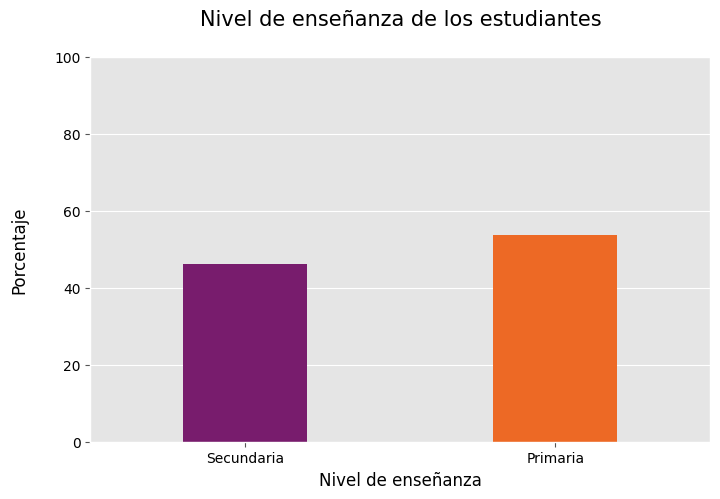

In [319]:
# Graficación de nivel de enseñanza

plt.figure(figsize=(8,5))

sns.countplot(data=df1,
                x='nivel_enseñanza',
                #hue='mujer',
                stat='percent',
                saturation=1, gap=0.5, palette='inferno');

plt.title('Nivel de enseñanza de los estudiantes\n', fontsize=15, color='black');
plt.xlabel('Nivel de enseñanza', fontsize=12, color='black');
plt.ylabel('Porcentaje\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,100);


In [320]:
# TRAMOS DE ENSEÑANZA

df1['nivel_enseñanza2'] = np.where(
    df1['SchoolGrade2022'] < 5, '1. 1ro-4to básicosico',
    np.where(
        (df1['SchoolGrade2022'] >= 5) & (df1['SchoolGrade2022'] < 9), '2. 5to-8vo básico',
        np.where(
            (df1['SchoolGrade2022'] >= 9) & (df1['SchoolGrade2022'] < 11), '3. 1ro-2do medio',
            '4. 3ro-4to medio'
        )
    )
)

df1['nivel_enseñanza2'].value_counts()

nivel_enseñanza2
2. 5to-8vo básico        2535
3. 1ro-2do medio         2270
1. 1ro-4to básicosico    2044
4. 3ro-4to medio         1667
Name: count, dtype: int64

In [321]:
df1['nivel_enseñanza2'].sort_values().unique()

array(['1. 1ro-4to básicosico', '2. 5to-8vo básico', '3. 1ro-2do medio',
       '4. 3ro-4to medio'], dtype=object)

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\2446007128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['nivel_enseñanza2'].sort_values(),


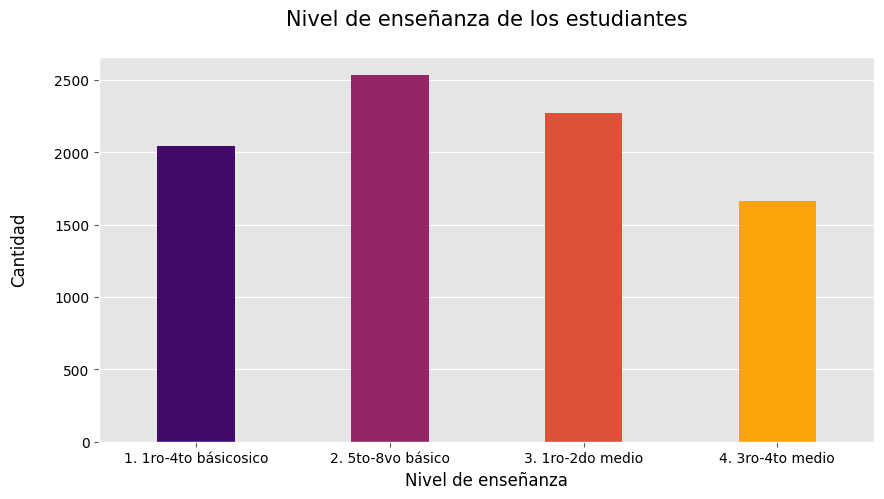

In [322]:
# Graficación de TRAMOS de enseñanza

plt.figure(figsize=(10,5))
df1['nivel_enseñanza2'].sort_values()
sns.countplot(x=df1['nivel_enseñanza2'].sort_values(),
                #hue='mujer',
                #stat='percent',
                saturation=1, 
                gap=0.5, 
                palette='inferno');

plt.title('Nivel de enseñanza de los estudiantes\n', fontsize=15, color='black');
plt.xlabel('Nivel de enseñanza', fontsize=12, color='black');
plt.ylabel('Cantidad\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
#plt.ylim(0,100);


In [324]:
df1['periodo_abandono'] = np.where(df['DropoutDate'] < '2022-05-31', 'Antes_31_mayo', 'Después_31_mayo')
df1['periodo_abandono'].value_counts()

periodo_abandono
Antes_31_mayo      4604
Después_31_mayo    3912
Name: count, dtype: int64

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\1218608831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1,


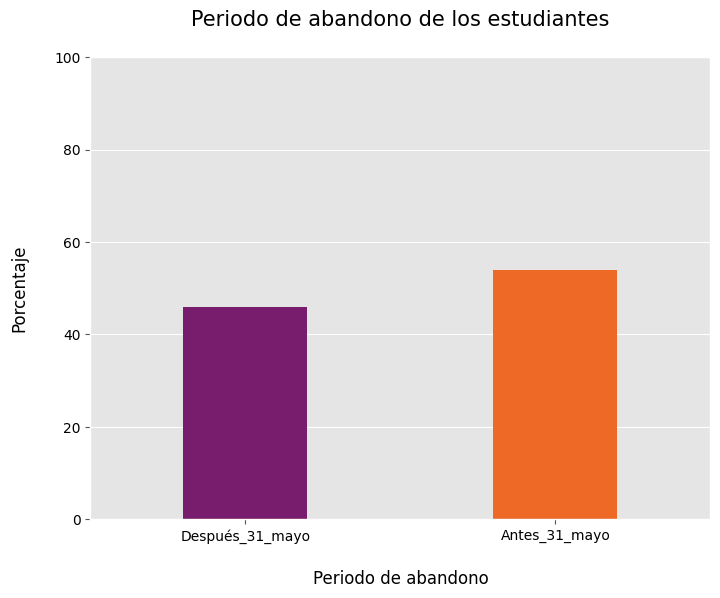

In [325]:
# Graficación de periodo de abandono

plt.figure(figsize=(8,6))

sns.countplot(data=df1,
                x='periodo_abandono',
                stat='percent',
                saturation=1, 
                gap=0.5, 
                palette='inferno');

plt.title('Periodo de abandono de los estudiantes\n', fontsize=15, color='black');
plt.xlabel('\nPeriodo de abandono', fontsize=12, color='black');
plt.ylabel('Porcentaje\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,100);


In [330]:
df1.columns.to_list()

['IDstudent',
 'IDschool',
 'SchoolGrade2022',
 'PrioritaryStudentIn2021',
 'Female',
 'Age',
 'AttendanceIn2021',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'GraduatedIn2022',
 'MunicipalSchool',
 'SchoolDaysFromMay302022',
 'DroppedOutMay30Before',
 'GPAin2021',
 'DayOfWeekDroppedOut_1',
 'DayOfWeekDroppedOut_2',
 'DayOfWeekDroppedOut_3',
 'DayOfWeekDroppedOut_4',
 'DayOfWeekDroppedOut_5',
 'bajo_rendimiento',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono']

In [332]:
df1 = pd.concat([df1, df['EnrolledByAug312022']],axis=1)

df1.columns

Index(['IDstudent', 'IDschool', 'SchoolGrade2022', 'PrioritaryStudentIn2021',
       'Female', 'Age', 'AttendanceIn2021', 'GraduatedIn2021', 'Migrant',
       'ListedInDropoutReport', 'SchoolPrincipalADP', 'GraduatedIn2022',
       'MunicipalSchool', 'SchoolDaysFromMay302022', 'DroppedOutMay30Before',
       'GPAin2021', 'DayOfWeekDroppedOut_1', 'DayOfWeekDroppedOut_2',
       'DayOfWeekDroppedOut_3', 'DayOfWeekDroppedOut_4',
       'DayOfWeekDroppedOut_5', 'bajo_rendimiento', 'nivel_enseñanza',
       'nivel_enseñanza2', 'periodo_abandono', 'EnrolledByAug312022'],
      dtype='object')

#### Test de asociación variables categoricas

In [333]:
import scipy.stats as stats

tab1=pd.crosstab(df1['EnrolledByAug312022'], df1['Female'],margins=False)

# Cálculo de la Chi cuadrado y p-valor
chi2, p, dof, expected = stats.chi2_contingency(observed=tab1)

display(tab1)
print("\nValores esperados:\n", expected)
print("\nValor de Chi cuadrado:", chi2)
print("\nP-valor:", p)
print("\nGrados de libertad:", dof)


Female,0,1
EnrolledByAug312022,,
0.0,755,1053
1.0,3243,3465



Valores esperados:
 [[ 848.80037576  959.19962424]
 [3149.19962424 3558.80037576]]

Valor de Chi cuadrado: 24.54105606262938

P-valor: 7.274320978819562e-07

Grados de libertad: 1


##### Función para implementar test de Chi-cuadrado

In [334]:
def test_chi2(df, var1, var2):
    print("\n\nTEST CHI-CUADRADO PARA LAS VARIABLES:", var1, "y", var2)
    print("\nTabla de contingencia Normalizada:")
    display(round(pd.crosstab(df[var1], df[var2], margins=True, margins_name="Total",normalize='columns')*100,1))
    tab=pd.crosstab(df[var1], df[var2], margins=False)
    chi2, p, dof, expected = stats.chi2_contingency(observed=tab)
    print("\nValores Observados")
    display(tab)
    print("\nValores esperados:\n", expected)
    print("\nHo: Las variables", var1, "y", var2, "son independientes")
    print("Ha: Las variables", var1, "y", var2, "son dependientes")
    print("\nValor de Chi cuadrado:", chi2)
    print("P-valor:", p)
    print("Grados de libertad:", dof)
    print("\nConclusión:")
    if p < 0.05:
        print("Rechazamos la hipótesis nula. Las variables", var1, "y", var2, "no varían de forma independiente")
    else:
        print("\nNo rechazamos la hipótesis nula", var1, "y", var2, "varían de forma independiente")

#### Test de chi-cuadrado entre vector objetivo y variables categóricas del dataset

In [335]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IDstudent                8516 non-null   int32  
 1   IDschool                 8516 non-null   int32  
 2   SchoolGrade2022          8516 non-null   int32  
 3   PrioritaryStudentIn2021  8516 non-null   int32  
 4   Female                   8516 non-null   int32  
 5   Age                      8516 non-null   int32  
 6   AttendanceIn2021         8516 non-null   int32  
 7   GraduatedIn2021          8516 non-null   int32  
 8   Migrant                  8516 non-null   int32  
 9   ListedInDropoutReport    8516 non-null   int32  
 10  SchoolPrincipalADP       8516 non-null   int32  
 11  GraduatedIn2022          8516 non-null   int32  
 12  MunicipalSchool          8516 non-null   int32  
 13  SchoolDaysFromMay302022  8516 non-null   int32  
 14  DroppedOutMay30Before   

In [336]:
df1.columns.to_list()

['IDstudent',
 'IDschool',
 'SchoolGrade2022',
 'PrioritaryStudentIn2021',
 'Female',
 'Age',
 'AttendanceIn2021',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'GraduatedIn2022',
 'MunicipalSchool',
 'SchoolDaysFromMay302022',
 'DroppedOutMay30Before',
 'GPAin2021',
 'DayOfWeekDroppedOut_1',
 'DayOfWeekDroppedOut_2',
 'DayOfWeekDroppedOut_3',
 'DayOfWeekDroppedOut_4',
 'DayOfWeekDroppedOut_5',
 'bajo_rendimiento',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono',
 'EnrolledByAug312022']

In [337]:
# Del dataset original, se eliminan las variables que no se utilizarán en el análisis (numéricas)

categoricas = [
 'PrioritaryStudentIn2021',
 'Female',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'EnrolledByAug312022',
 'GraduatedIn2022',
 'MunicipalSchool',
 'DroppedOutMay30Before',
 'bajo_rendimiento',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono']


In [338]:
# Se realiza el test de Chi cuadrado para todas las variables categóricas utilizando una lista de comprensión

[test_chi2(df1,'EnrolledByAug312022',cats) for cats in categoricas];



TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y PrioritaryStudentIn2021

Tabla de contingencia Normalizada:


PrioritaryStudentIn2021,0,1,Total
EnrolledByAug312022,,,
0.0,19.5,22.1,21.2
1.0,80.5,77.9,78.8



Valores Observados


PrioritaryStudentIn2021,0,1
EnrolledByAug312022,,
0.0,588,1220
1.0,2420,4288



Valores esperados:
 [[ 638.61719117 1169.38280883]
 [2369.38280883 4338.61719117]]

Ho: Las variables EnrolledByAug312022 y PrioritaryStudentIn2021 son independientes
Ha: Las variables EnrolledByAug312022 y PrioritaryStudentIn2021 son dependientes

Valor de Chi cuadrado: 7.7199975133071295
P-valor: 0.005461247153564485
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y PrioritaryStudentIn2021 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y Female

Tabla de contingencia Normalizada:


Female,0,1,Total
EnrolledByAug312022,,,
0.0,18.9,23.3,21.2
1.0,81.1,76.7,78.8



Valores Observados


Female,0,1
EnrolledByAug312022,,
0.0,755,1053
1.0,3243,3465



Valores esperados:
 [[ 848.80037576  959.19962424]
 [3149.19962424 3558.80037576]]

Ho: Las variables EnrolledByAug312022 y Female son independientes
Ha: Las variables EnrolledByAug312022 y Female son dependientes

Valor de Chi cuadrado: 24.54105606262938
P-valor: 7.274320978819562e-07
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y Female no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y GraduatedIn2021

Tabla de contingencia Normalizada:


GraduatedIn2021,0,1,Total
EnrolledByAug312022,,,
0.0,40.8,19.2,21.2
1.0,59.2,80.8,78.8



Valores Observados


GraduatedIn2021,0,1
EnrolledByAug312022,,
0.0,322,1486
1.0,468,6240



Valores esperados:
 [[ 167.72193518 1640.27806482]
 [ 622.27806482 6085.72193518]]

Ho: Las variables EnrolledByAug312022 y GraduatedIn2021 son independientes
Ha: Las variables EnrolledByAug312022 y GraduatedIn2021 son dependientes

Valor de Chi cuadrado: 197.29790139134636
P-valor: 8.119137619640416e-45
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y GraduatedIn2021 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y Migrant

Tabla de contingencia Normalizada:


Migrant,0,1,Total
EnrolledByAug312022,,,
0.0,20.8,24.3,21.2
1.0,79.2,75.7,78.8



Valores Observados


Migrant,0,1
EnrolledByAug312022,,
0.0,1565,243
1.0,5953,755



Valores esperados:
 [[1596.11836543  211.88163457]
 [5921.88163457  786.11836543]]

Ho: Las variables EnrolledByAug312022 y Migrant son independientes
Ha: Las variables EnrolledByAug312022 y Migrant son dependientes

Valor de Chi cuadrado: 6.362775785790522
P-valor: 0.011653908584998656
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y Migrant no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y ListedInDropoutReport

Tabla de contingencia Normalizada:


ListedInDropoutReport,0,1,Total
EnrolledByAug312022,,,
0.0,13.5,55.9,21.2
1.0,86.5,44.1,78.8



Valores Observados


ListedInDropoutReport,0,1
EnrolledByAug312022,,
0.0,944,864
1.0,6025,683



Valores esperados:
 [[1479.56223579  328.43776421]
 [5489.43776421 1218.56223579]]

Ho: Las variables EnrolledByAug312022 y ListedInDropoutReport son independientes
Ha: Las variables EnrolledByAug312022 y ListedInDropoutReport son dependientes

Valor de Chi cuadrado: 1352.2696467217106
P-valor: 4.94840270008938e-296
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y ListedInDropoutReport no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y SchoolPrincipalADP

Tabla de contingencia Normalizada:


SchoolPrincipalADP,0,1,Total
EnrolledByAug312022,,,
0.0,19.1,23.9,21.2
1.0,80.9,76.1,78.8



Valores Observados


SchoolPrincipalADP,0,1
EnrolledByAug312022,,
0.0,899,909
1.0,3817,2891



Valores esperados:
 [[1001.23626116  806.76373884]
 [3714.76373884 2993.23626116]]

Ho: Las variables EnrolledByAug312022 y SchoolPrincipalADP son independientes
Ha: Las variables EnrolledByAug312022 y SchoolPrincipalADP son dependientes

Valor de Chi cuadrado: 29.410989181429507
P-valor: 5.854472286371369e-08
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y SchoolPrincipalADP no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0,Total
EnrolledByAug312022,,,
0.0,100.0,0.0,21.2
1.0,0.0,100.0,78.8



Valores Observados


EnrolledByAug312022,0.0,1.0
EnrolledByAug312022,,
0.0,1808,0
1.0,0,6708



Valores esperados:
 [[ 383.84969469 1424.15030531]
 [1424.15030531 5283.84969469]]

Ho: Las variables EnrolledByAug312022 y EnrolledByAug312022 son independientes
Ha: Las variables EnrolledByAug312022 y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 8510.021343785282
P-valor: 0.0
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y GraduatedIn2022

Tabla de contingencia Normalizada:


GraduatedIn2022,0,1,Total
EnrolledByAug312022,,,
0.0,61.2,3.4,21.2
1.0,38.8,96.6,78.8



Valores Observados


GraduatedIn2022,0,1
EnrolledByAug312022,,
0.0,1607,201
1.0,1019,5689



Valores esperados:
 [[ 557.51620479 1250.48379521]
 [2068.48379521 4639.51620479]]

Ho: Las variables EnrolledByAug312022 y GraduatedIn2022 son independientes
Ha: Las variables EnrolledByAug312022 y GraduatedIn2022 son dependientes

Valor de Chi cuadrado: 3622.7888309127597
P-valor: 0.0
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y GraduatedIn2022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y MunicipalSchool

Tabla de contingencia Normalizada:


MunicipalSchool,0,1,Total
EnrolledByAug312022,,,
0.0,18.0,24.0,21.2
1.0,82.0,76.0,78.8



Valores Observados


MunicipalSchool,0,1
EnrolledByAug312022,,
0.0,706,1102
1.0,3220,3488



Valores esperados:
 [[ 833.51432597  974.48567403]
 [3092.48567403 3615.51432597]]

Ho: Las variables EnrolledByAug312022 y MunicipalSchool son independientes
Ha: Las variables EnrolledByAug312022 y MunicipalSchool son dependientes

Valor de Chi cuadrado: 45.588774015764514
P-valor: 1.4587523105895878e-11
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y MunicipalSchool no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y DroppedOutMay30Before

Tabla de contingencia Normalizada:


DroppedOutMay30Before,0,1,Total
EnrolledByAug312022,,,
0.0,21.2,21.3,21.2
1.0,78.8,78.7,78.8



Valores Observados


DroppedOutMay30Before,0,1
EnrolledByAug312022,,
0.0,829,979
1.0,3083,3625



Valores esperados:
 [[ 830.54203852  977.45796148]
 [3081.45796148 3626.54203852]]

Ho: Las variables EnrolledByAug312022 y DroppedOutMay30Before son independientes
Ha: Las variables EnrolledByAug312022 y DroppedOutMay30Before son dependientes

Valor de Chi cuadrado: 0.003070074118008287
P-valor: 0.955813223746591
Grados de libertad: 1

Conclusión:

No rechazamos la hipótesis nula EnrolledByAug312022 y DroppedOutMay30Before varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y bajo_rendimiento

Tabla de contingencia Normalizada:


bajo_rendimiento,0,1,Total
EnrolledByAug312022,,,
0.0,19.0,40.8,21.2
1.0,81.0,59.2,78.8



Valores Observados


bajo_rendimiento,0,1
EnrolledByAug312022,,
0.0,1446,362
1.0,6183,525



Valores esperados:
 [[1619.68435885  188.31564115]
 [6009.31564115  698.68435885]]

Ho: Las variables EnrolledByAug312022 y bajo_rendimiento son independientes
Ha: Las variables EnrolledByAug312022 y bajo_rendimiento son dependientes

Valor de Chi cuadrado: 225.70520567849906
P-valor: 5.1523254342413626e-51
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y bajo_rendimiento no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y nivel_enseñanza

Tabla de contingencia Normalizada:


nivel_enseñanza,Primaria,Secundaria,Total
EnrolledByAug312022,,,
0.0,13.7,29.9,21.2
1.0,86.3,70.1,78.8



Valores Observados


nivel_enseñanza,Primaria,Secundaria
EnrolledByAug312022,,
0.0,629,1179
1.0,3950,2758



Valores esperados:
 [[ 972.15030531  835.84969469]
 [3606.84969469 3101.15030531]]

Ho: Las variables EnrolledByAug312022 y nivel_enseñanza son independientes
Ha: Las variables EnrolledByAug312022 y nivel_enseñanza son dependientes

Valor de Chi cuadrado: 331.6512711085484
P-valor: 4.198952724105075e-74
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y nivel_enseñanza no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y nivel_enseñanza2

Tabla de contingencia Normalizada:


nivel_enseñanza2,1. 1ro-4to básicosico,2. 5to-8vo básico,3. 1ro-2do medio,4. 3ro-4to medio,Total
EnrolledByAug312022,,,,,
0.0,14.1,13.5,24.1,37.9,21.2
1.0,85.9,86.5,75.9,62.1,78.8



Valores Observados


nivel_enseñanza2,1. 1ro-4to básicosico,2. 5to-8vo básico,3. 1ro-2do medio,4. 3ro-4to medio
EnrolledByAug312022,,,,
0.0,288,341,548,631
1.0,1756,2194,1722,1036



Valores esperados:
 [[ 433.953969    538.19633631  481.93518084  353.91451386]
 [1610.046031   1996.80366369 1788.06481916 1313.08548614]]

Ho: Las variables EnrolledByAug312022 y nivel_enseñanza2 son independientes
Ha: Las variables EnrolledByAug312022 y nivel_enseñanza2 son dependientes

Valor de Chi cuadrado: 440.9502104769182
P-valor: 2.978480860997762e-95
Grados de libertad: 3

Conclusión:
Rechazamos la hipótesis nula. Las variables EnrolledByAug312022 y nivel_enseñanza2 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES: EnrolledByAug312022 y periodo_abandono

Tabla de contingencia Normalizada:


periodo_abandono,Antes_31_mayo,Después_31_mayo,Total
EnrolledByAug312022,,,
0.0,21.3,21.2,21.2
1.0,78.7,78.8,78.8



Valores Observados


periodo_abandono,Antes_31_mayo,Después_31_mayo
EnrolledByAug312022,,
0.0,979,829
1.0,3625,3083



Valores esperados:
 [[ 977.45796148  830.54203852]
 [3626.54203852 3081.45796148]]

Ho: Las variables EnrolledByAug312022 y periodo_abandono son independientes
Ha: Las variables EnrolledByAug312022 y periodo_abandono son dependientes

Valor de Chi cuadrado: 0.003070074118008287
P-valor: 0.955813223746591
Grados de libertad: 1

Conclusión:

No rechazamos la hipótesis nula EnrolledByAug312022 y periodo_abandono varían de forma independiente


In [339]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IDstudent                8516 non-null   int32  
 1   IDschool                 8516 non-null   int32  
 2   SchoolGrade2022          8516 non-null   int32  
 3   PrioritaryStudentIn2021  8516 non-null   int32  
 4   Female                   8516 non-null   int32  
 5   Age                      8516 non-null   int32  
 6   AttendanceIn2021         8516 non-null   int32  
 7   GraduatedIn2021          8516 non-null   int32  
 8   Migrant                  8516 non-null   int32  
 9   ListedInDropoutReport    8516 non-null   int32  
 10  SchoolPrincipalADP       8516 non-null   int32  
 11  GraduatedIn2022          8516 non-null   int32  
 12  MunicipalSchool          8516 non-null   int32  
 13  SchoolDaysFromMay302022  8516 non-null   int32  
 14  DroppedOutMay30Before   

In [340]:
df1.head(5)

,IDstudent,IDschool,SchoolGrade2022,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,...,DayOfWeekDroppedOut_1,DayOfWeekDroppedOut_2,DayOfWeekDroppedOut_3,DayOfWeekDroppedOut_4,DayOfWeekDroppedOut_5,bajo_rendimiento,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,EnrolledByAug312022
0,1,1,12,0,0,18,55,0,0,0,...,0,0,0,0,1,1,Secundaria,4. 3ro-4to medio,Después_31_mayo,0.0
1,2,1,9,0,1,15,55,0,0,1,...,0,0,0,0,1,1,Secundaria,3. 1ro-2do medio,Antes_31_mayo,1.0
2,3,1,10,1,1,14,88,1,0,0,...,0,0,1,0,0,0,Secundaria,3. 1ro-2do medio,Antes_31_mayo,0.0
3,4,4,10,1,1,14,90,1,0,1,...,1,0,0,0,0,0,Secundaria,3. 1ro-2do medio,Antes_31_mayo,0.0
4,5,4,12,0,1,17,100,1,0,0,...,0,0,1,0,0,0,Secundaria,4. 3ro-4to medio,Después_31_mayo,0.0


In [341]:
# codifcar variables object

df1['nivel_enseñanza'] = df1['nivel_enseñanza'].replace({'Primaria':0, 'Secundaria':1})
df1['periodo_abandono'] = df1['periodo_abandono'].replace({'Antes_corte':0, 'Después_corte':1})

df1.head(5)

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\3542108813.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['nivel_enseñanza'] = df1['nivel_enseñanza'].replace({'Primaria':0, 'Secundaria':1})


,IDstudent,IDschool,SchoolGrade2022,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,...,DayOfWeekDroppedOut_1,DayOfWeekDroppedOut_2,DayOfWeekDroppedOut_3,DayOfWeekDroppedOut_4,DayOfWeekDroppedOut_5,bajo_rendimiento,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,EnrolledByAug312022
0,1,1,12,0,0,18,55,0,0,0,...,0,0,0,0,1,1,1,4. 3ro-4to medio,Después_31_mayo,0.0
1,2,1,9,0,1,15,55,0,0,1,...,0,0,0,0,1,1,1,3. 1ro-2do medio,Antes_31_mayo,1.0
2,3,1,10,1,1,14,88,1,0,0,...,0,0,1,0,0,0,1,3. 1ro-2do medio,Antes_31_mayo,0.0
3,4,4,10,1,1,14,90,1,0,1,...,1,0,0,0,0,0,1,3. 1ro-2do medio,Antes_31_mayo,0.0
4,5,4,12,0,1,17,100,1,0,0,...,0,0,1,0,0,0,1,4. 3ro-4to medio,Después_31_mayo,0.0


In [342]:
df1.columns.to_list()

['IDstudent',
 'IDschool',
 'SchoolGrade2022',
 'PrioritaryStudentIn2021',
 'Female',
 'Age',
 'AttendanceIn2021',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'GraduatedIn2022',
 'MunicipalSchool',
 'SchoolDaysFromMay302022',
 'DroppedOutMay30Before',
 'GPAin2021',
 'DayOfWeekDroppedOut_1',
 'DayOfWeekDroppedOut_2',
 'DayOfWeekDroppedOut_3',
 'DayOfWeekDroppedOut_4',
 'DayOfWeekDroppedOut_5',
 'bajo_rendimiento',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono',
 'EnrolledByAug312022']

In [343]:
df1['nivel_enseñanza2'] = df1['nivel_enseñanza2'].replace({'1. 1ro-4to básicosico':1,'2. 5to-8vo básico':2, '3. 1ro-2do medio':3, '4. 3ro-4to medio':4})

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\1619265919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['nivel_enseñanza2'] = df1['nivel_enseñanza2'].replace({'1. 1ro-4to básicosico':1,'2. 5to-8vo básico':2, '3. 1ro-2do medio':3, '4. 3ro-4to medio':4})


In [344]:
df1['periodo_abandono'] = df1['periodo_abandono'].replace({'Antes_31_mayo':0, 'Después_31_mayo':1})

C:\Users\luian\AppData\Local\Temp\ipykernel_9140\2173775161.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['periodo_abandono'] = df1['periodo_abandono'].replace({'Antes_31_mayo':0, 'Después_31_mayo':1})


In [345]:
categoricas2 = [  
 'PrioritaryStudentIn2021',
 'Female',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'EnrolledByAug312022',
 'GraduatedIn2022',
 'MunicipalSchool',
 'DroppedOutMay30Before',
 'bajo_rendimiento',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono'
 ]


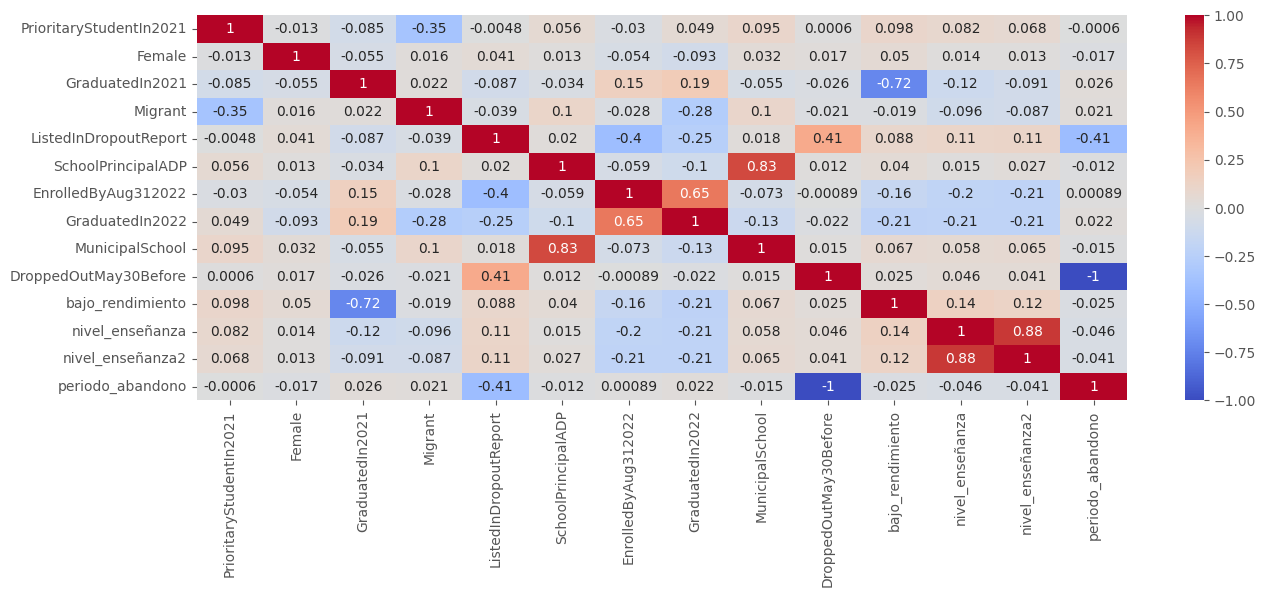

In [346]:
plt.figure(figsize=(15, 5))
sns.heatmap(df1[categoricas2].corr(), annot=True, cmap='coolwarm', center=0);

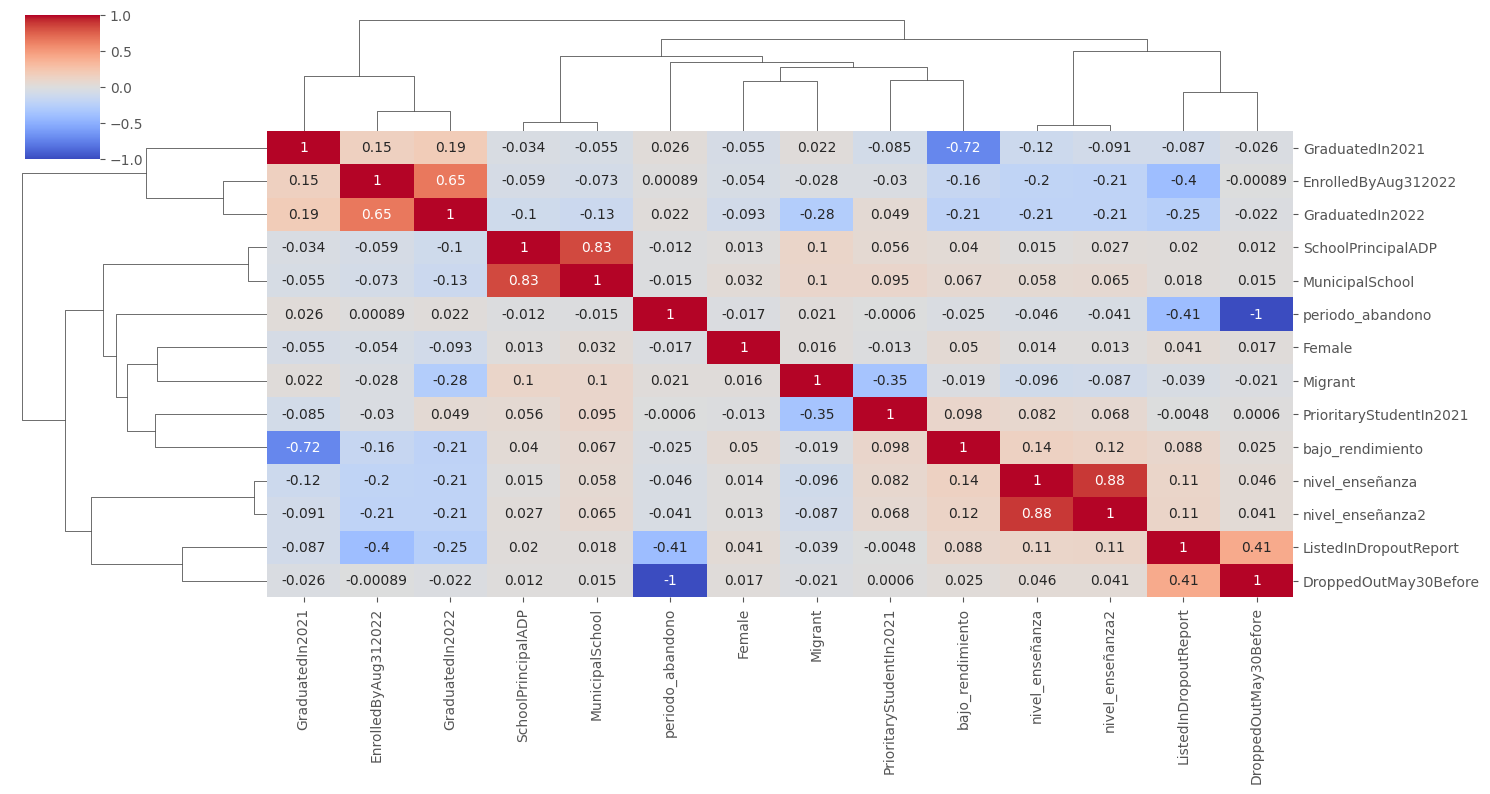

In [347]:
# clustermap

#plt.figure(figsize=(15, 5))
sns.clustermap(df1[categoricas2].corr(), annot=True, cmap='coolwarm', center=0, method='ward', figsize=(15, 8));

#### **NOTA**:  
Recordar que graduado 2022 produce datalekeage

#### Generación de nuevos atributos

In [353]:
df.columns.to_list()

['IDstudent',
 'IDschool',
 'SchoolGrade2022',
 'DropoutDate',
 'DayOfWeekDroppedOut',
 'PrioritaryStudentIn2021',
 'Female',
 'Age',
 'GPAin2021',
 'AttendanceIn2021',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'EnrolledByAug312022',
 'GraduatedIn2022',
 'MunicipalSchool',
 'SchoolDaysFromMay302022',
 'DroppedOutMay30Before']

In [354]:
df1['fecha_reporte'] = '2022-08-31'

In [355]:
df1['fecha_reporte'] = pd.to_datetime(df1['fecha_reporte'])

In [356]:
df1['anticipacion_abandono'] = df1['fecha_reporte'] - df['DropoutDate']  

In [357]:
df1.head(3)

,IDstudent,IDschool,SchoolGrade2022,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,...,DayOfWeekDroppedOut_3,DayOfWeekDroppedOut_4,DayOfWeekDroppedOut_5,bajo_rendimiento,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,EnrolledByAug312022,fecha_reporte,anticipacion_abandono
0,1,1,12,0,0,18,55,0,0,0,...,0,0,1,1,1,4,1,0.0,2022-08-31,75 days
1,2,1,9,0,1,15,55,0,0,1,...,0,0,1,1,1,3,0,1.0,2022-08-31,110 days
2,3,1,10,1,1,14,88,1,0,0,...,1,0,0,0,1,3,0,0.0,2022-08-31,133 days


In [358]:
df1['anticipacion_abandono'].value_counts().sort_values(ascending=False)

anticipacion_abandono
36 days     307
37 days     273
35 days     245
33 days     207
121 days    197
           ... 
89 days      85
58 days      72
56 days      43
57 days      27
72 days      13
Name: count, Length: 61, dtype: int64

In [359]:
df1['anticipacion_abandono'] = df1['anticipacion_abandono'].dt.days

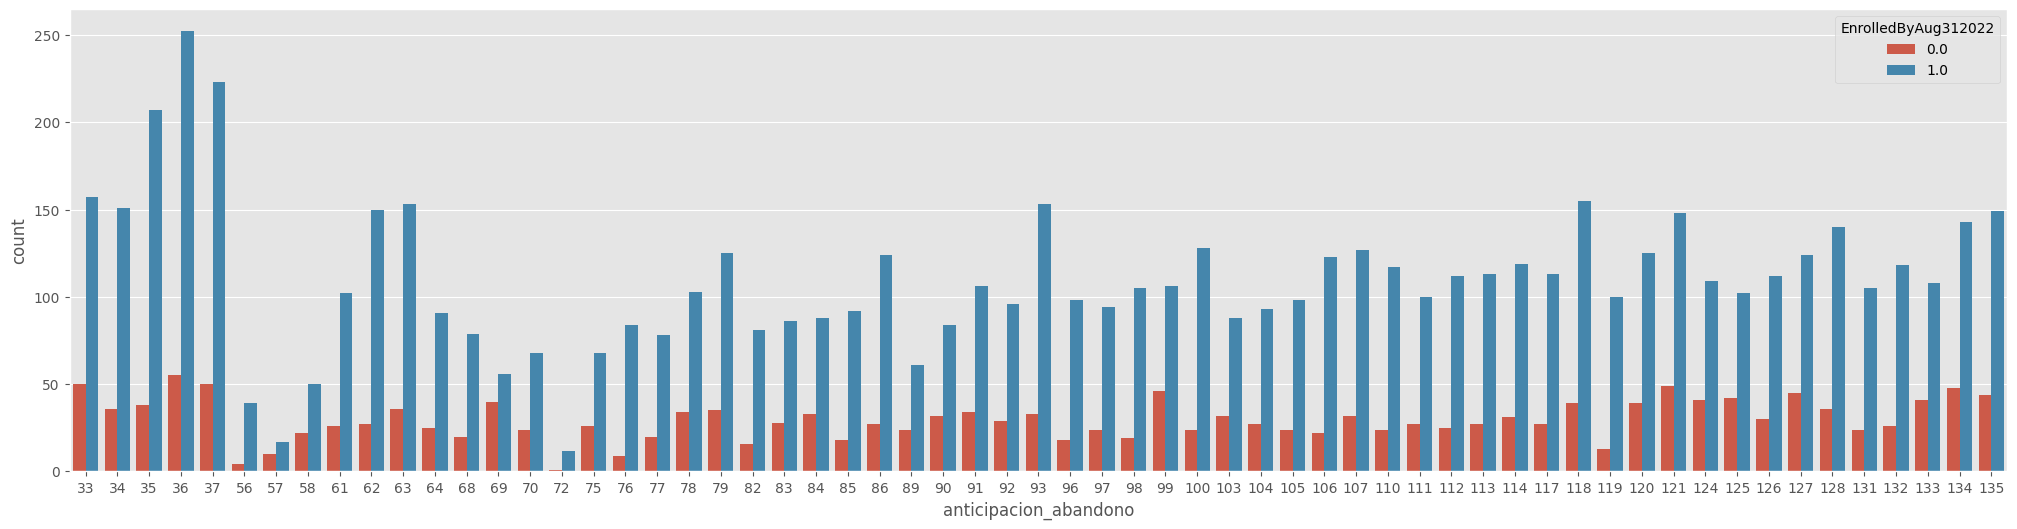

In [361]:
plt.figure(figsize=(25,6))

sns.countplot(data=df1, x='anticipacion_abandono', hue='EnrolledByAug312022');

In [365]:
df1.columns.to_list()

['IDstudent',
 'IDschool',
 'SchoolGrade2022',
 'PrioritaryStudentIn2021',
 'Female',
 'Age',
 'AttendanceIn2021',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'GraduatedIn2022',
 'MunicipalSchool',
 'SchoolDaysFromMay302022',
 'DroppedOutMay30Before',
 'GPAin2021',
 'DayOfWeekDroppedOut_1',
 'DayOfWeekDroppedOut_2',
 'DayOfWeekDroppedOut_3',
 'DayOfWeekDroppedOut_4',
 'DayOfWeekDroppedOut_5',
 'bajo_rendimiento',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono',
 'EnrolledByAug312022',
 'fecha_reporte',
 'anticipacion_abandono']

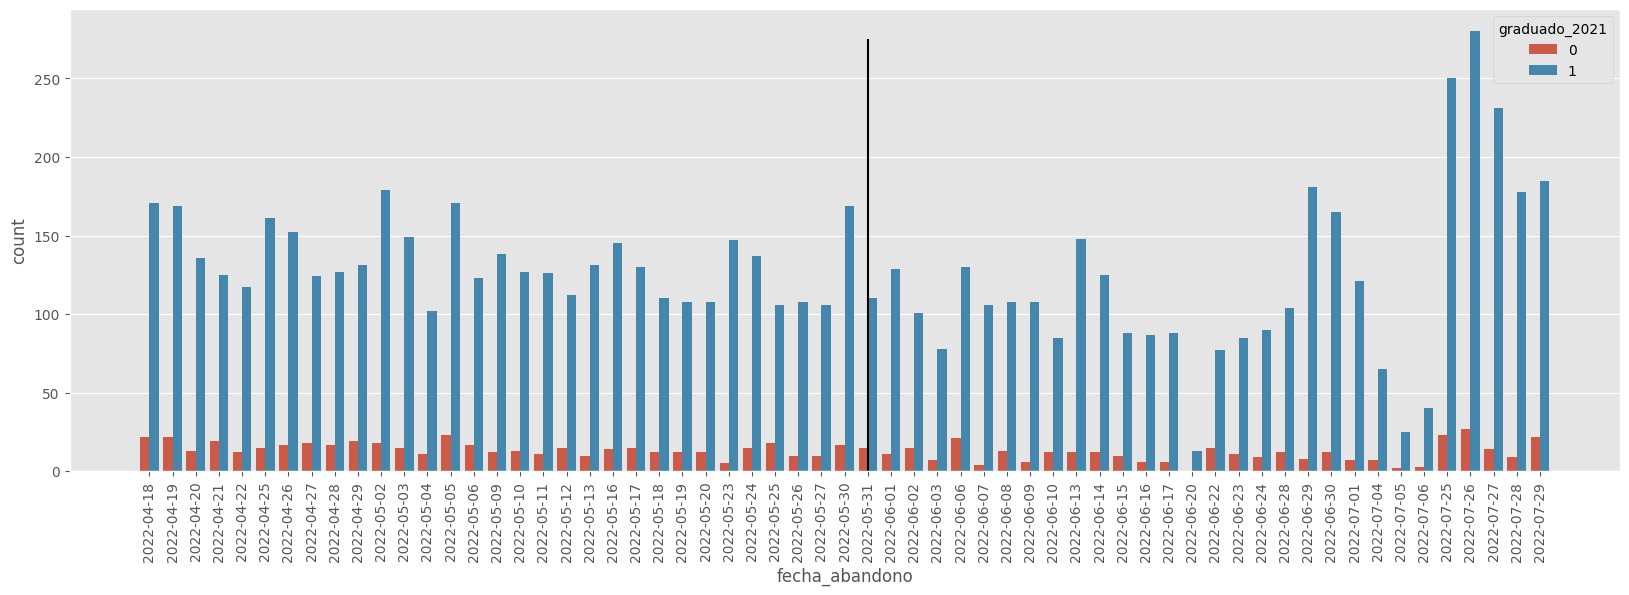

In [65]:
plt.figure(figsize=(20,6))
sns.countplot(data=df1, x='fecha_abandono',order=df['fecha_abandono'].sort_values().unique(), hue='graduado_2021')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=275, color='black', linestyle='-');

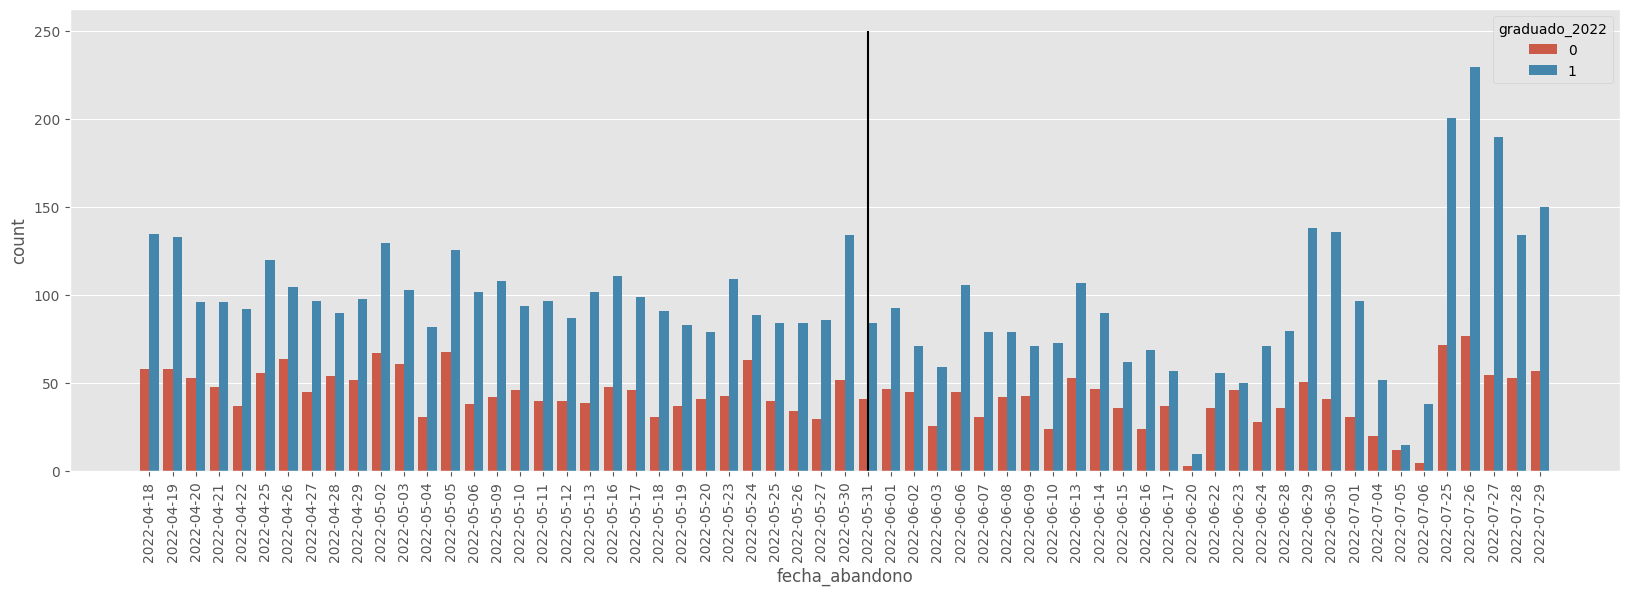

In [66]:
plt.figure(figsize=(20,6))
sns.countplot(data=df1, x='fecha_abandono',order=df['fecha_abandono'].sort_values().unique(), hue='graduado_2022')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=250, color='black', linestyle='-');

In [366]:
df1.head(3)

,IDstudent,IDschool,SchoolGrade2022,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,...,DayOfWeekDroppedOut_3,DayOfWeekDroppedOut_4,DayOfWeekDroppedOut_5,bajo_rendimiento,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,EnrolledByAug312022,fecha_reporte,anticipacion_abandono
0,1,1,12,0,0,18,55,0,0,0,...,0,0,1,1,1,4,1,0.0,2022-08-31,75
1,2,1,9,0,1,15,55,0,0,1,...,0,0,1,1,1,3,0,1.0,2022-08-31,110
2,3,1,10,1,1,14,88,1,0,0,...,1,0,0,0,1,3,0,0.0,2022-08-31,133


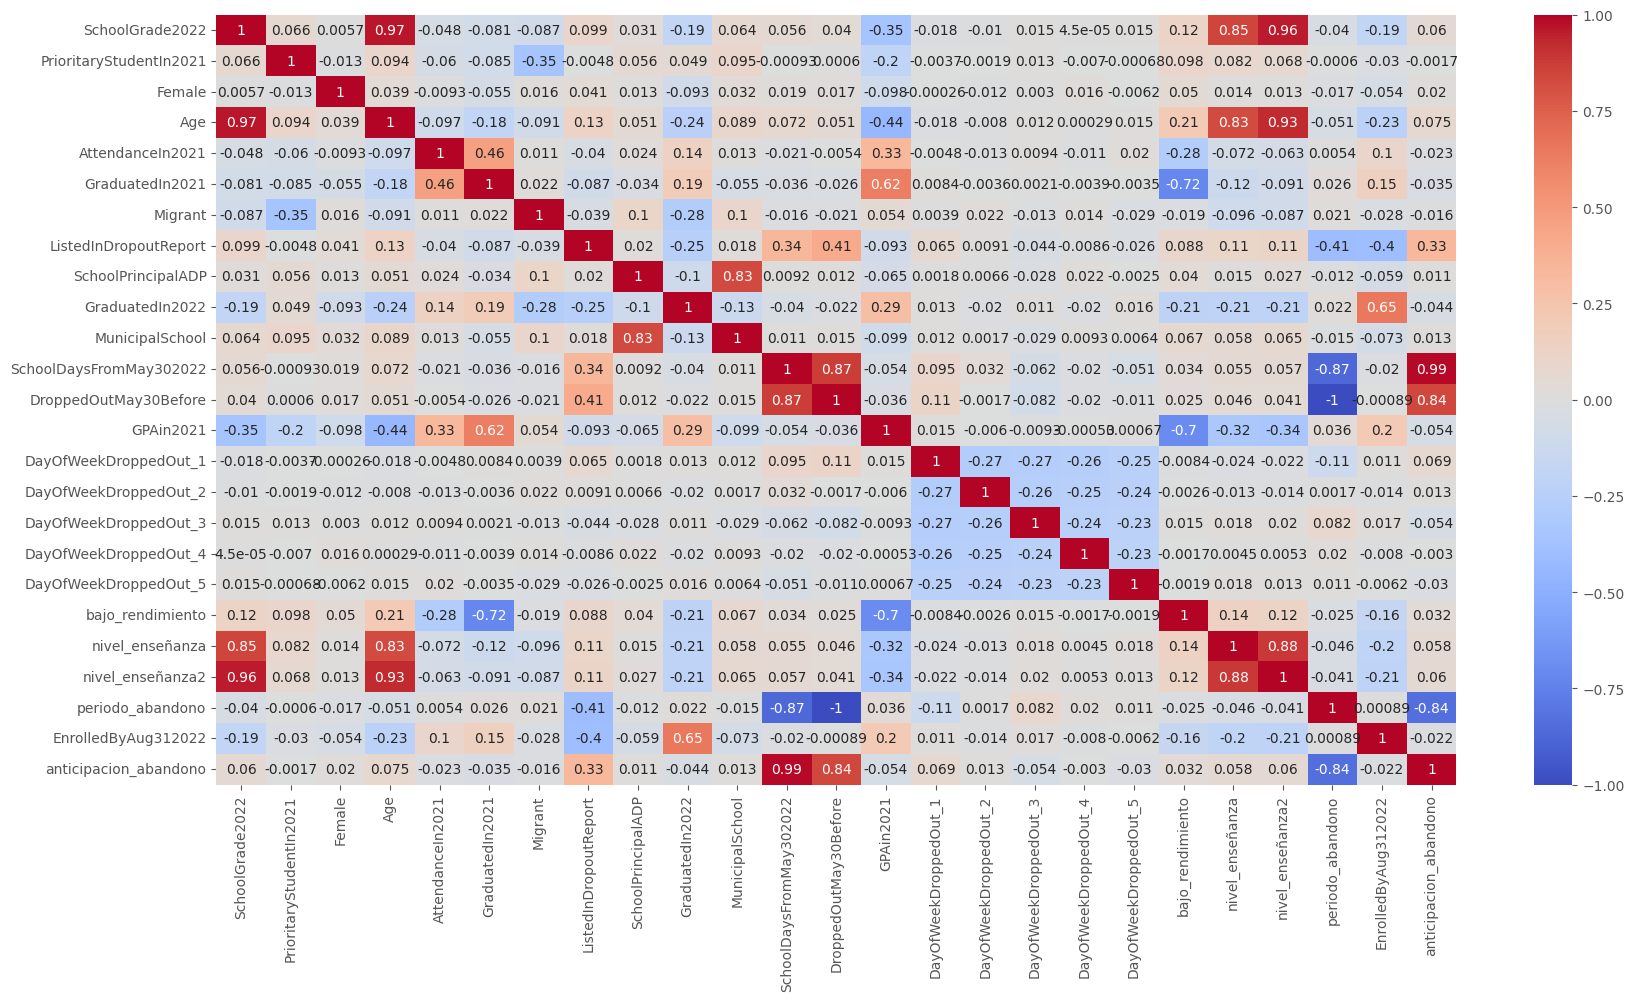

In [369]:

#df1.drop(['fecha_reporte'], axis=1, inplace=True)

plt.figure(figsize=(20,10))

sns.heatmap(df1.iloc[:,2:].corr(), annot=True, cmap='coolwarm', center=0);

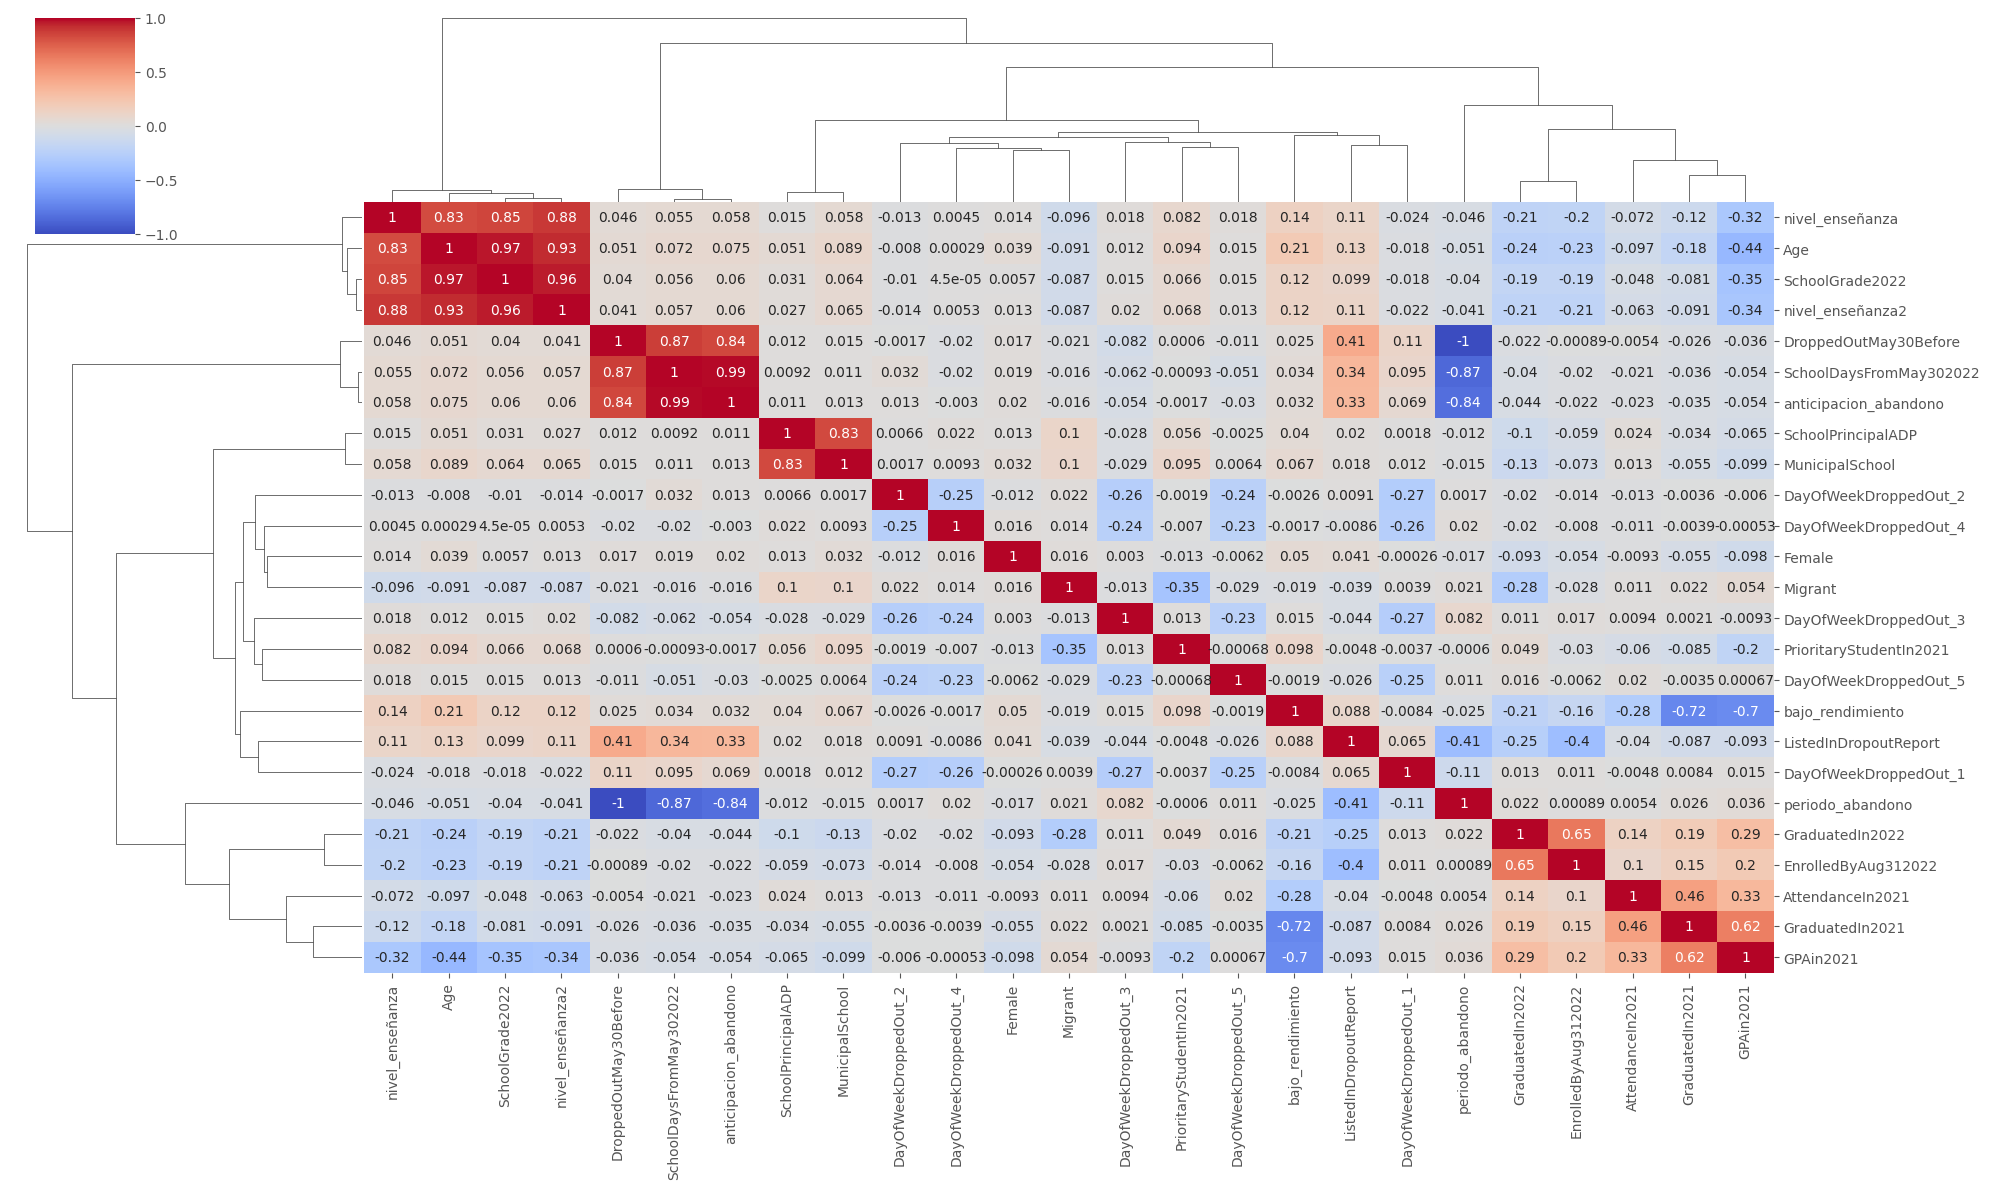

In [371]:
sns.clustermap(df1.iloc[:,2:].corr(), annot=True, cmap='coolwarm', center=0, method='ward', figsize=(20, 12));

In [372]:
df1['GPAin2021'].isnull().sum()

0

### Filtrado y análisis de NA